In [9]:
import xarray as xr
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np

In [10]:
swb1_dir = '../swb1/'
swb_dir = '../swb2/'

# suppress exponential notation in plotting format
plt.rcParams['axes.formatter.useoffset'] = False
%matplotlib inline

In [11]:
comparison_cell_dict = {#'Deciduous_forest':['96','44','553927','459454'],
                        'Evergreen_forest':['128','65','556791','457569'],
#                        'Potato_field':['177','202','561167','445224'],
                        'Corn':['115','319','555602','434644'],
                        'Winter_wheat':['254','56','568129','458340'],
                        'Sugar_beets': ['283','203','570741','445112']}

soil_variable_pairs = {1: ['potential_recharge','net_infiltration'],
                       2: ['ref_et0','reference_ET0'],
                       3: ['soil_storage','soil_storage'],
                       4: ['interception','interception'],
                       5: ['irrigation','irrigation'],
                       6: ['bare_soil_evap','bare_soil_evap'],
                       7: ['kcb','crop_coefficient_kcb'],
                       8: ['current_rooting_depth','current_rooting_depth'],
                       9: ['plant_stress_coef_ks','plant_stress_coef_ks'],
                      10: ['total_available_water','total_available_water'],
                      11: ['readily_available_water','readily_available_water'],
                      12: ['evap_reduction_coef_kr','evap_reduction_coef_kr'], 
                      13: ['surf_evap_coef_ke','surf_evap_coef_ke'],
#                      14: ['sm_deficit','soil_moisture_deficit'],
                      15: ['snowmelt','snowmelt'],
                      16: ['snow_cover','snow_storage'],
                      17: ['runoff','runoff'],
                      18: ['crop_etc','crop_etc'],
                      19: ['gross_precip','gross_precip']}

precip_variable_pairs = {1: ['potential_recharge','net_infiltration'],
                       2: ['soil_storage','soil_storage'],
                       3: ['interception','interception'],
                       4: ['irrigation','irrigation'],
                       5: ['snowmelt','snowmelt'],
                       6: ['net_rainfall','net_rainfall'],  
                       7: ['snow_cover','snow_storage'],
                       8: ['runoff','runoff']}

atmos_variable_pairs = {1: ['tmin','tmin'],
                        2: ['tmax','tmax'],
                        3: ['tmean','tmean'],
                        4: ['snow_cover','snow_storage']}


landuse_codes = {141:'Deciduous forest',
                 142:'Evergreen forest',
                  43:'Potato'}

In [12]:
def read_swb1_csv( colnum, rownum ):
    filename = 'SWB_variable_values__col_' + colnum + '__row_' + rownum + '.csv'
    df = pd.read_csv(swb1_dir + filename, skipinitialspace=True,index_col=False)
    df.reindex()
    df = df.assign(date=pd.to_datetime(df[['year','month','day']]))
    return df

In [13]:
def read_swb2_csv( colnum, rownum, xcoord, ycoord ):
    filename = 'SWB2_variable_values__col_' + colnum + '__row_' + rownum + '__x_' + xcoord + '__y_' + ycoord + '.csv'
    df = pd.read_csv(swb_dir + filename, skipinitialspace=True,index_col=False)
    df.reindex()
    df = df.assign(date=pd.to_datetime(df[['year','month','day']]))
    return df

In [14]:
def create_joined_subset(swb1_df, swb2_df, swb1_colname, swb2_colname):
    swb1_ss = swb1_df.filter(['date', swb1_colname]) 
    swb2_ss = swb2_df.filter(['date', swb2_colname]) 
    comparison_df = pd.merge(swb1_ss,
                             swb2_ss,
                             left_on=swb1_ss.date, 
                             right_on=swb2_ss.date).drop(columns=['date_y'])
    comparison_df.columns=["date", "swb1_"+swb1_colname, "swb2_"+swb2_colname]
    return(comparison_df)

In [15]:
def make_plots( swb1_daily, swb2_daily, description ):
    for key, value in variable_pairs.items():
        swb1_fieldname = value[0]
        swb2_fieldname = value[1]
        cc = create_joined_subset(swb1_daily, swb2_daily, swb1_fieldname, swb2_fieldname)
        if cc.count()[0] > 0:
    #        slope, intercept, r_value, p_value, std_err = stats.linregress(cc.iloc[:,1], cc.iloc[:,2])
    #            if( slope > 0.0 and r_value < 0.9 ):
            lu_code = swb2_daily.landuse_code[0]
            lu_desc = landuse_codes.get(lu_code)
            title_txt = swb2_fieldname + ":  " + str(lu_code) + " - " + description 
            fig, axes = plt.subplots(1,2,figsize=(17,12))
            fig.constrained_layout=True
            fig.suptitle(title_txt)
            maxx = np.nanmax(cc.iloc[:,2])
            minx = np.nanmin(cc.iloc[:,2])
            axes[0].plot(cc.iloc[:,1].values,cc.iloc[:,2],"+")
            axes[0].plot([minx,maxx],[minx,maxx],"r-")
            axes[0].set_xlabel('SWB1: ' + swb1_fieldname)
            axes[0].set_ylabel('SWB2: ' + swb2_fieldname)
            axes[1].plot(cc.iloc[:,0].values,cc.iloc[:,1].values,label='SWB1: ' + swb1_fieldname)
            axes[1].plot(cc.iloc[:,0].values,cc.iloc[:,2].values,label='SWB2: ' + swb2_fieldname)
            axes[1].legend()
            table(axes[1], np.round(cc.head(n=6), 5), colWidths=[0.2, 0.2, 0.2],loc='top',bbox=[0.1, -0.25, 0.8, 0.15])

Evergreen_forest ['128', '65', '556791', '457569']
Corn ['115', '319', '555602', '434644']


/Users/smwesten/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Winter_wheat ['254', '56', '568129', '458340']
Sugar_beets ['283', '203', '570741', '445112']


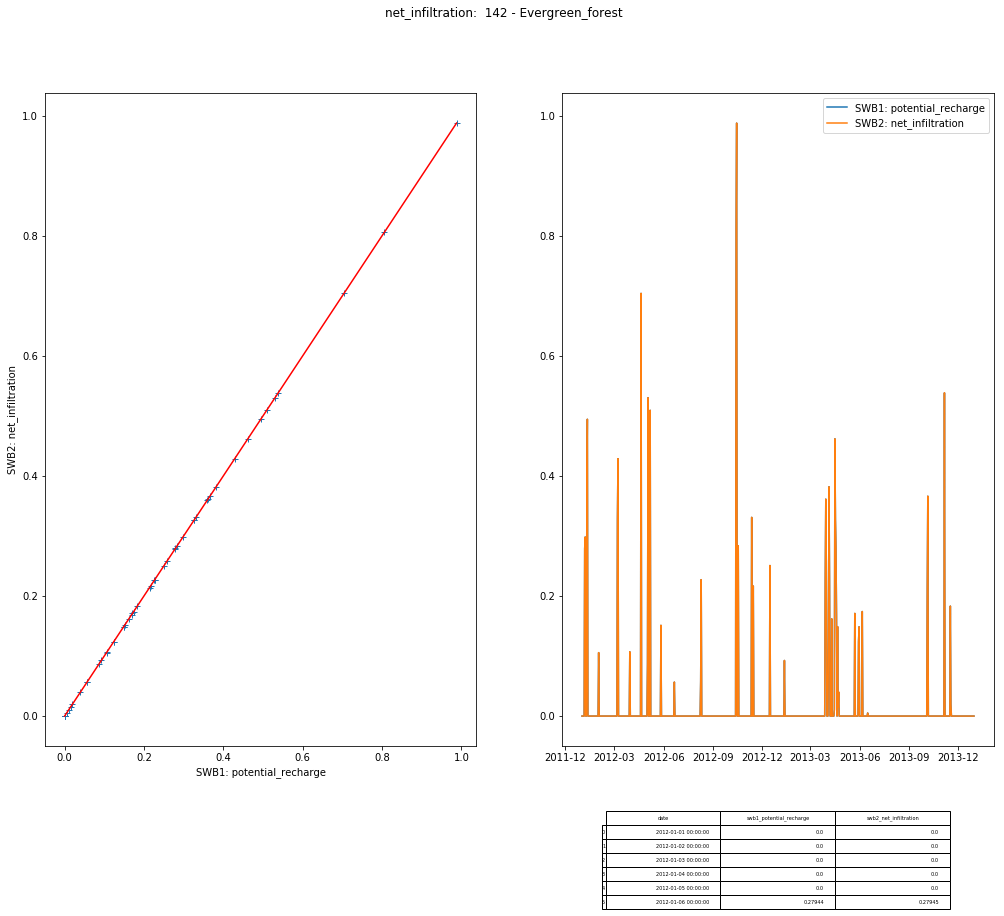

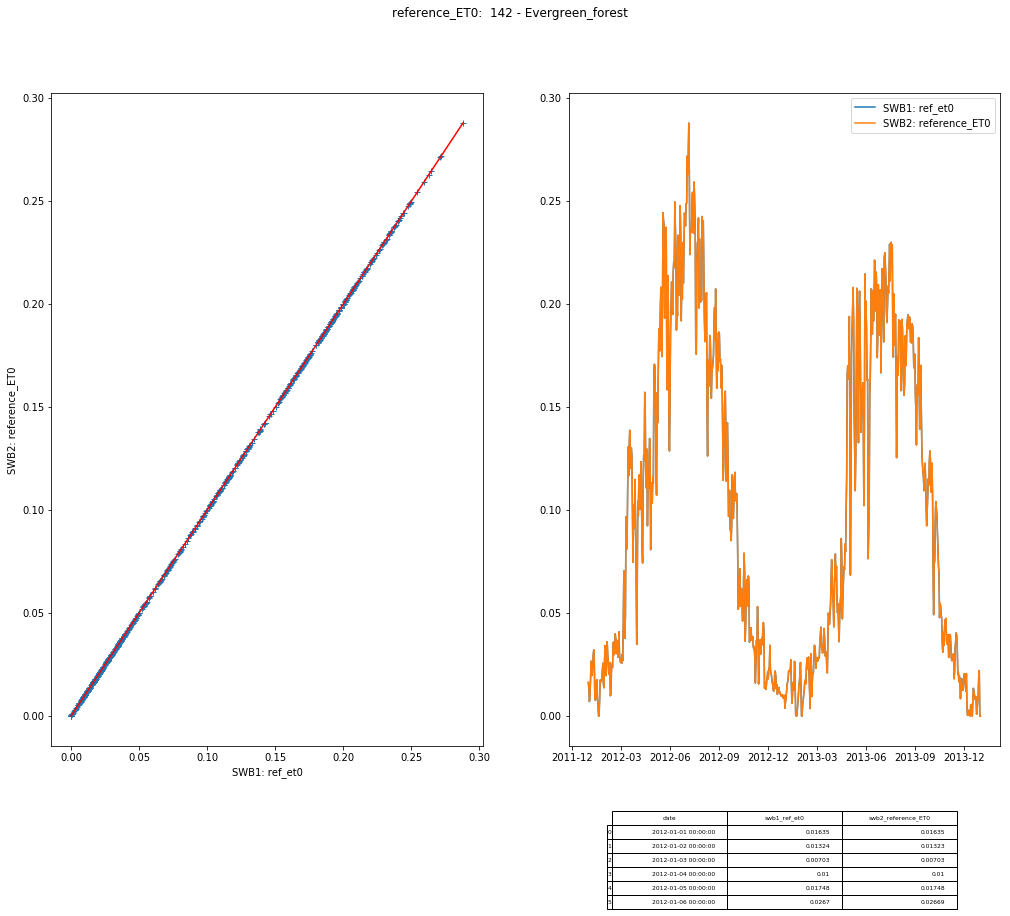

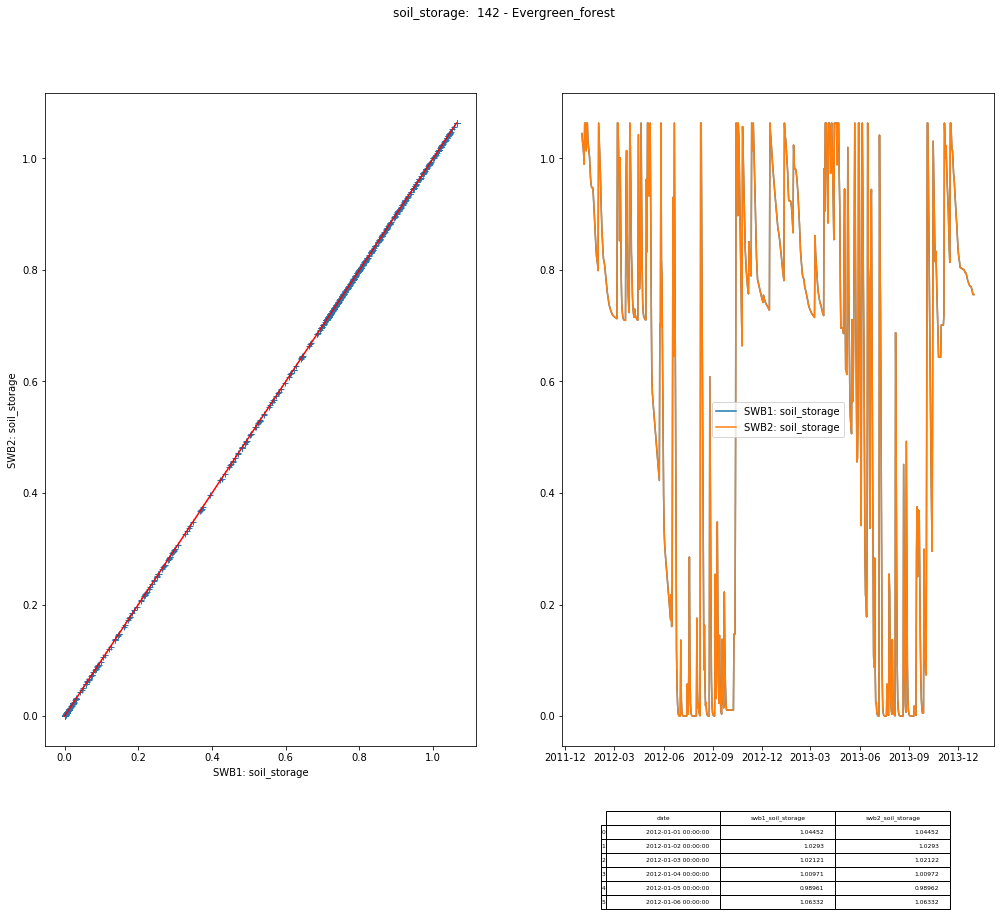

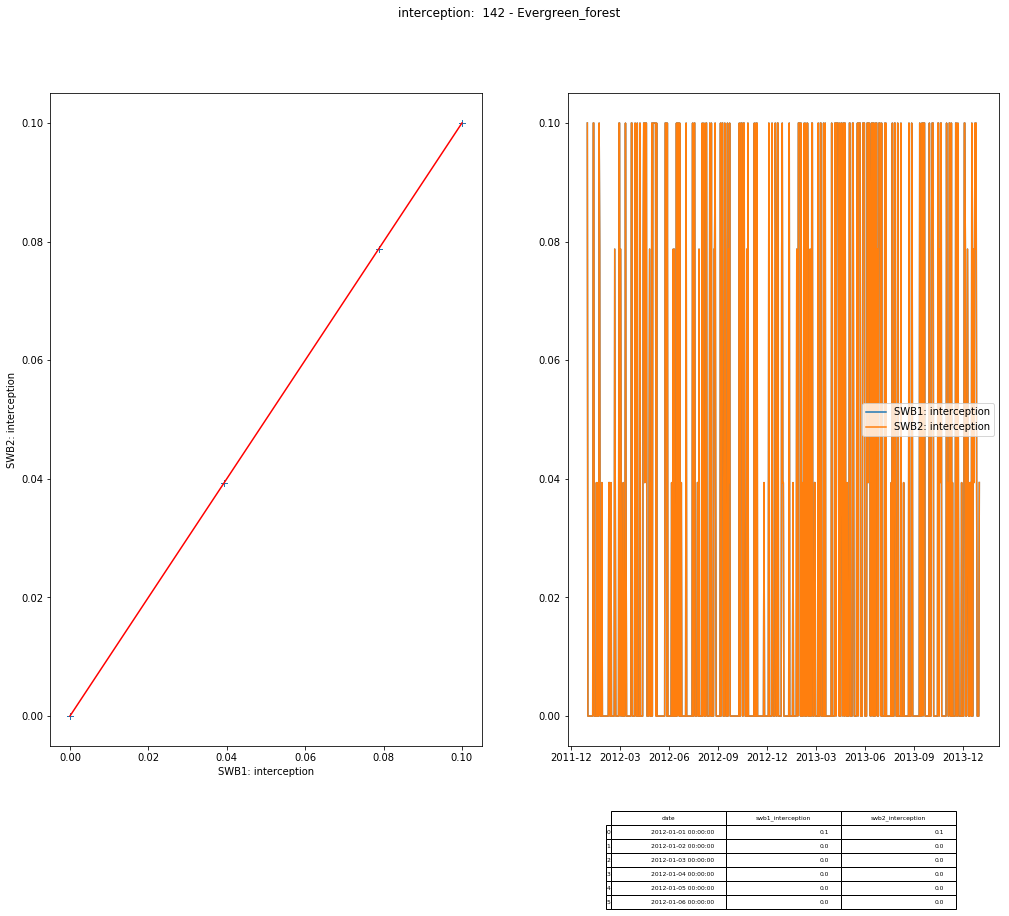

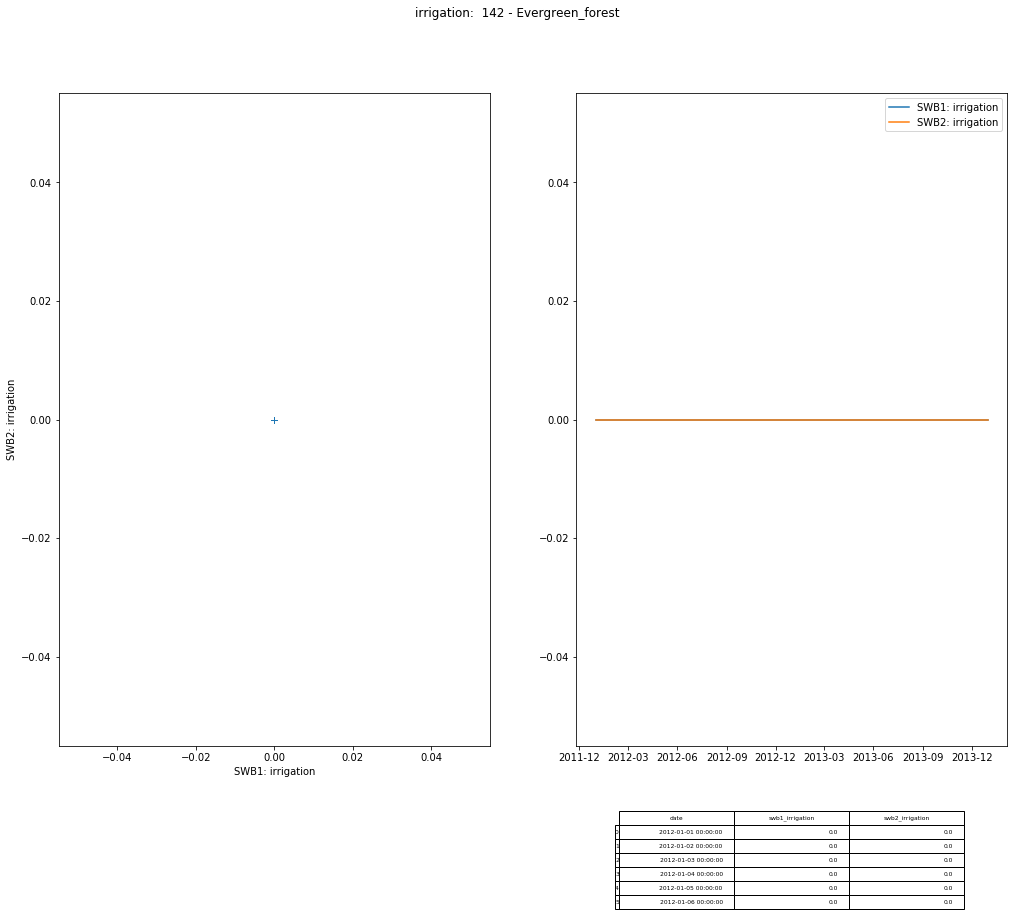

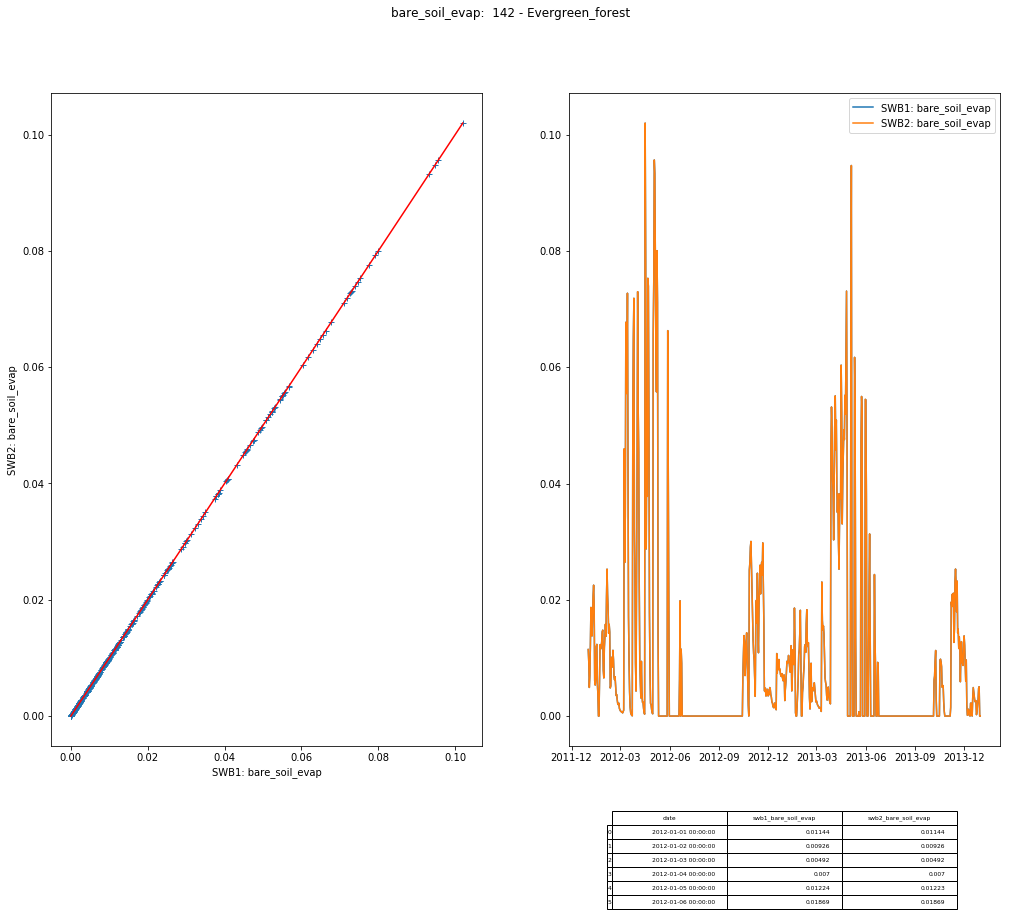

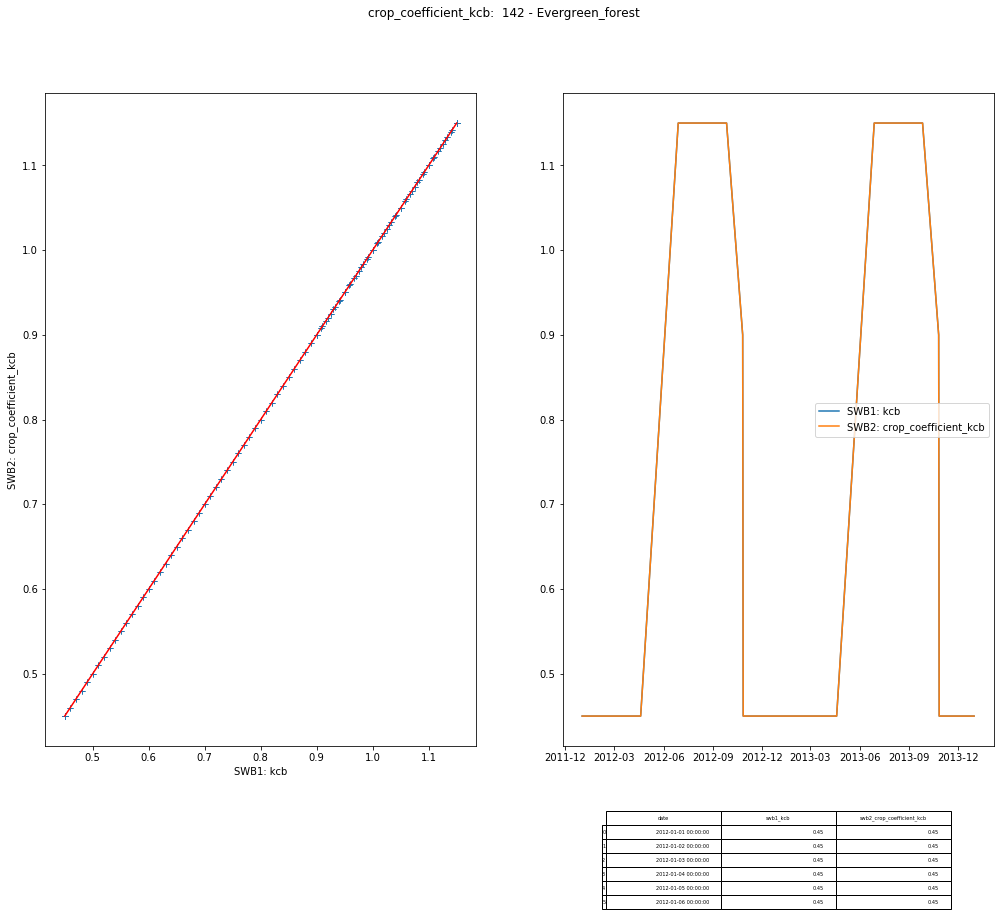

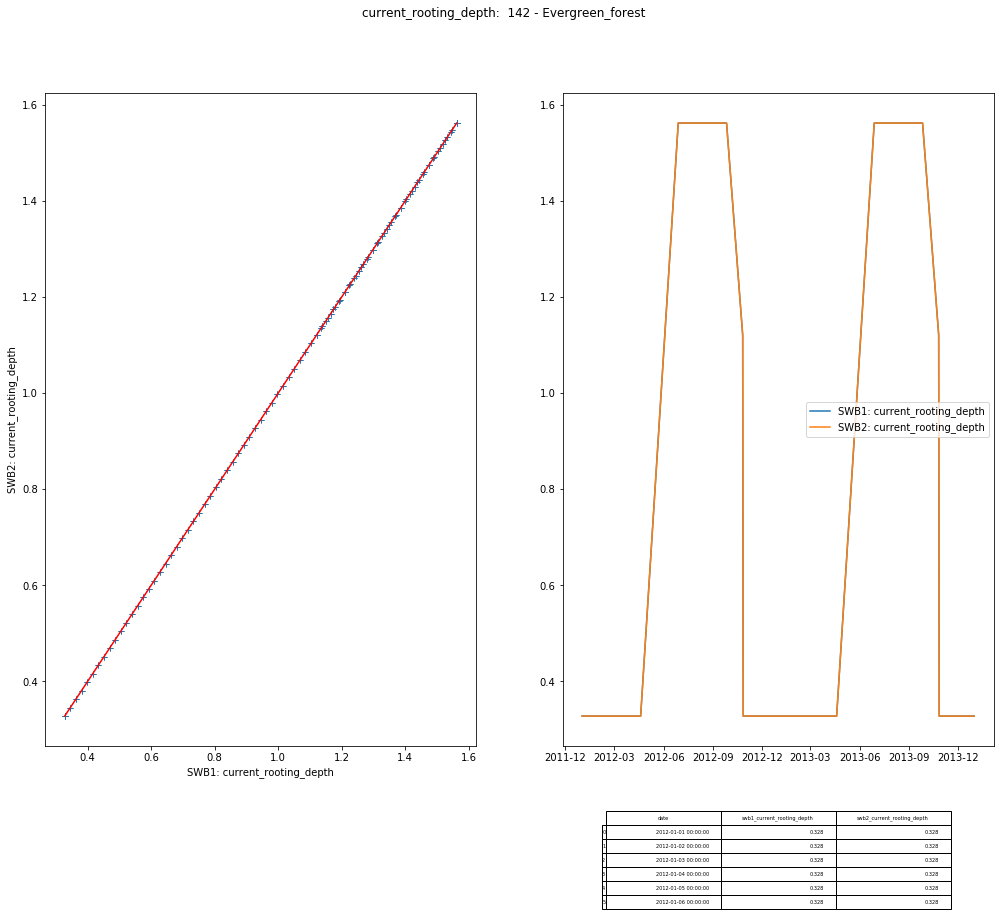

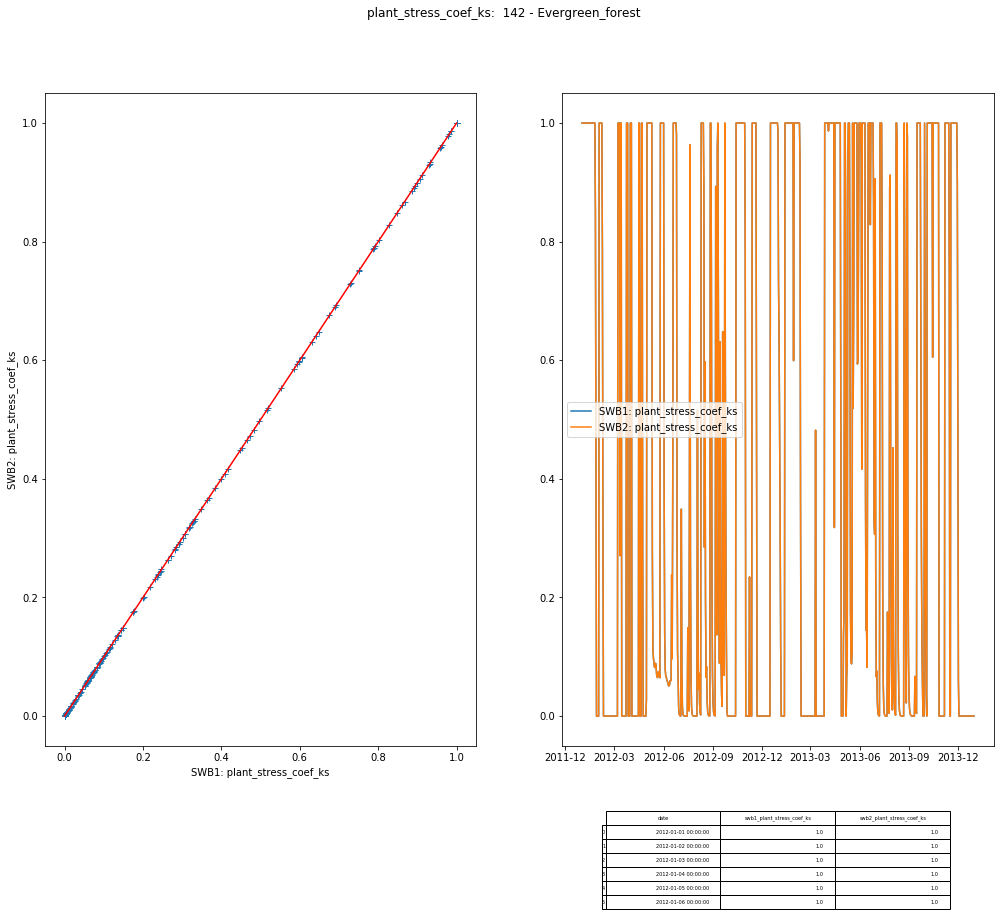

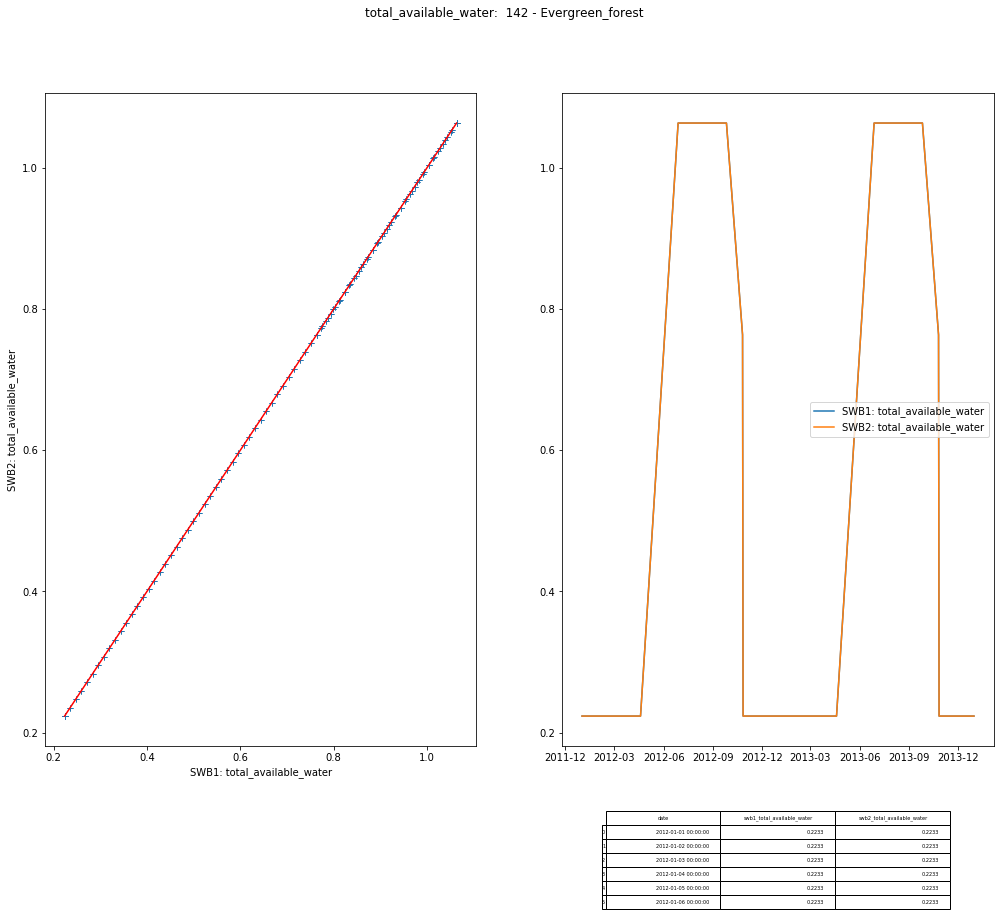

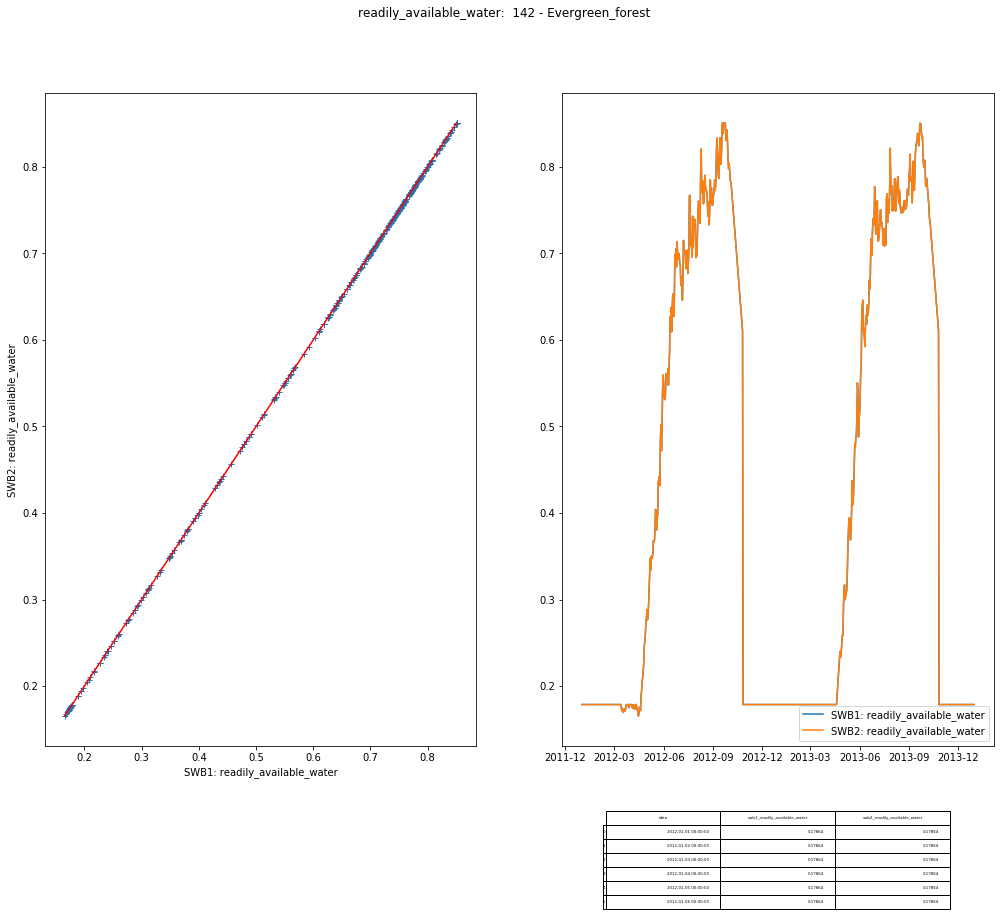

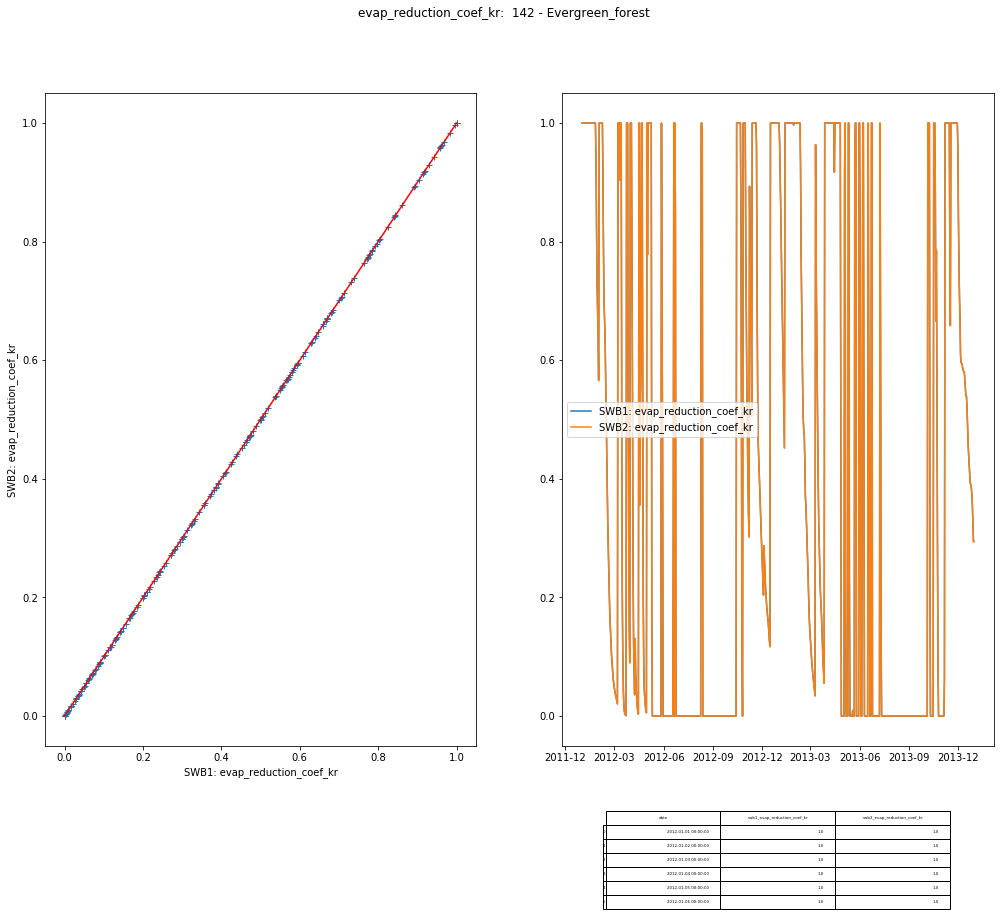

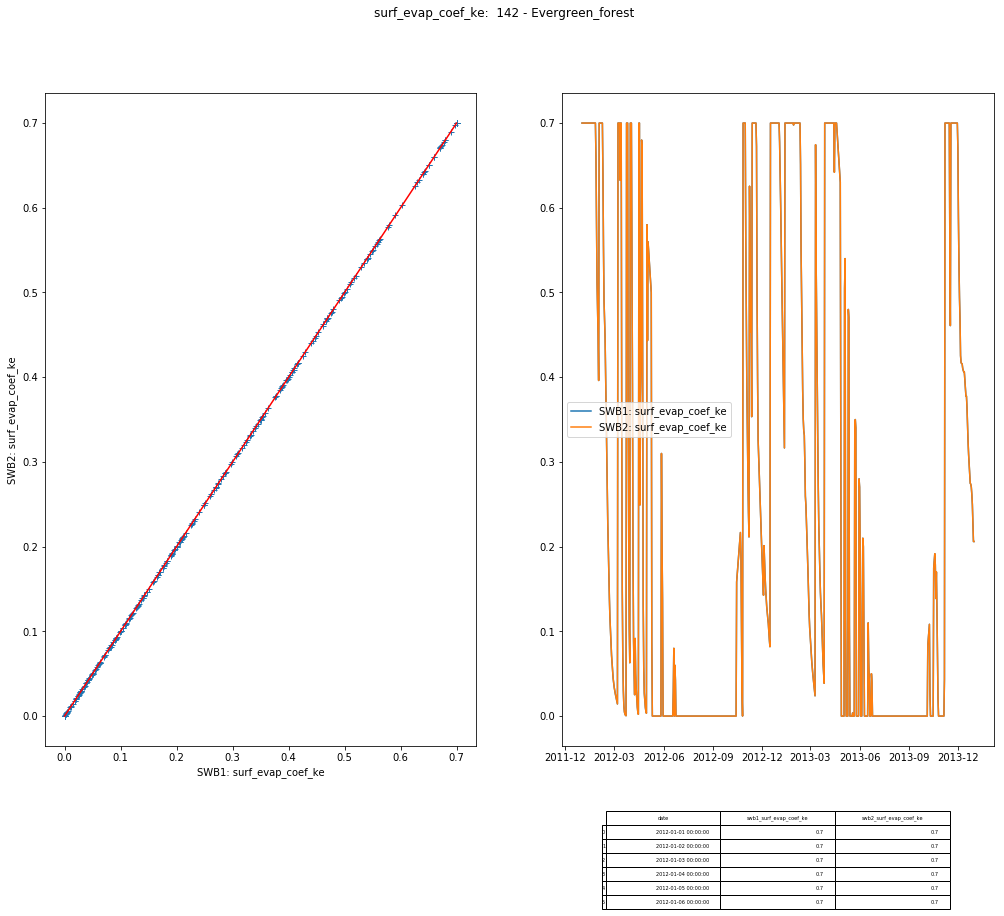

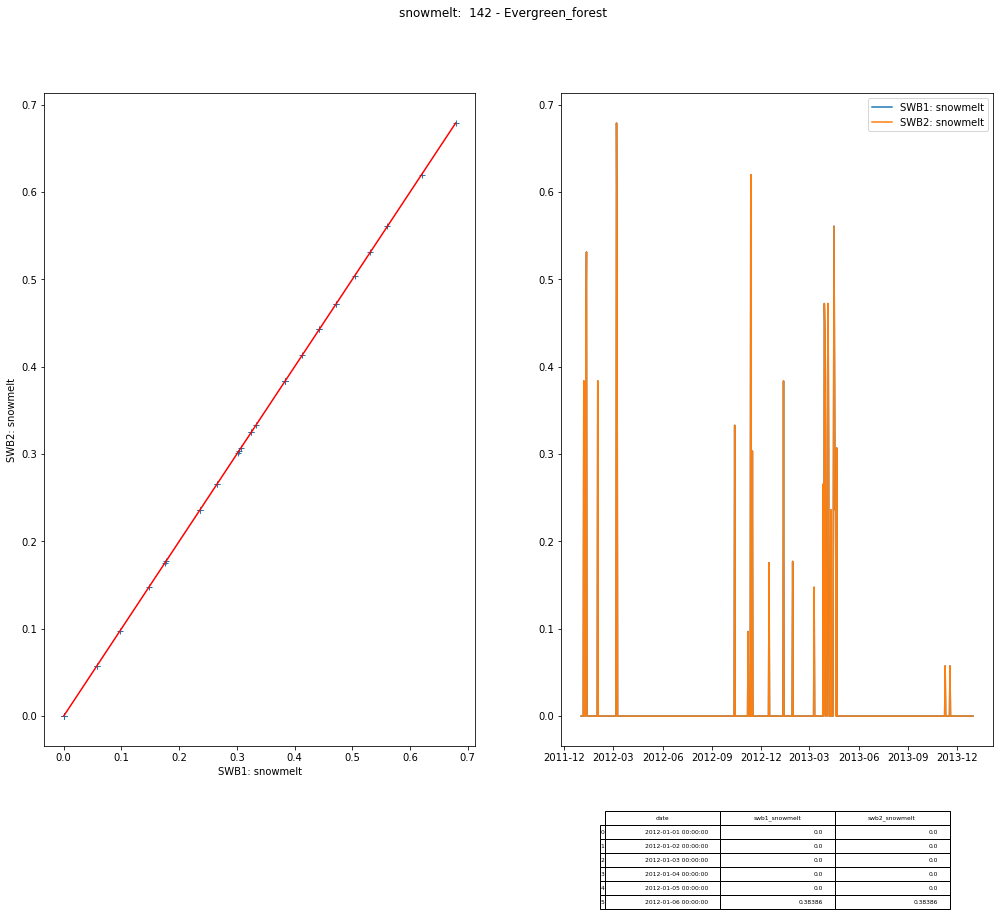

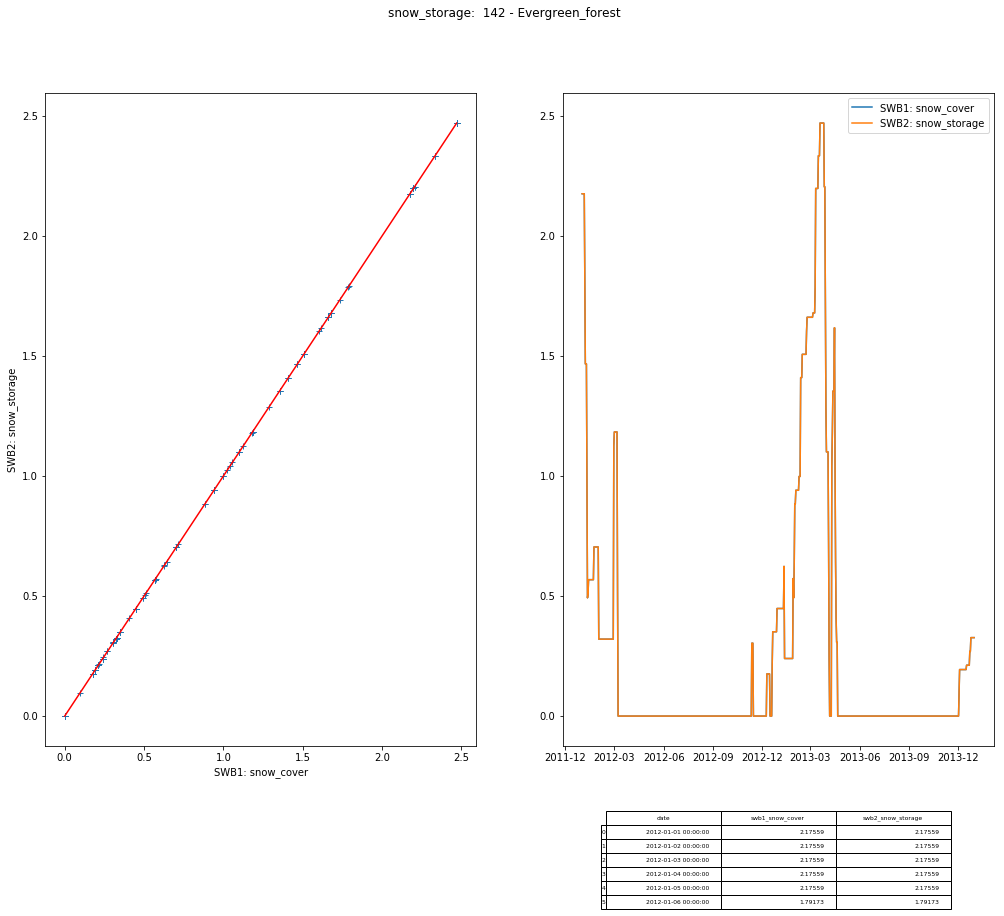

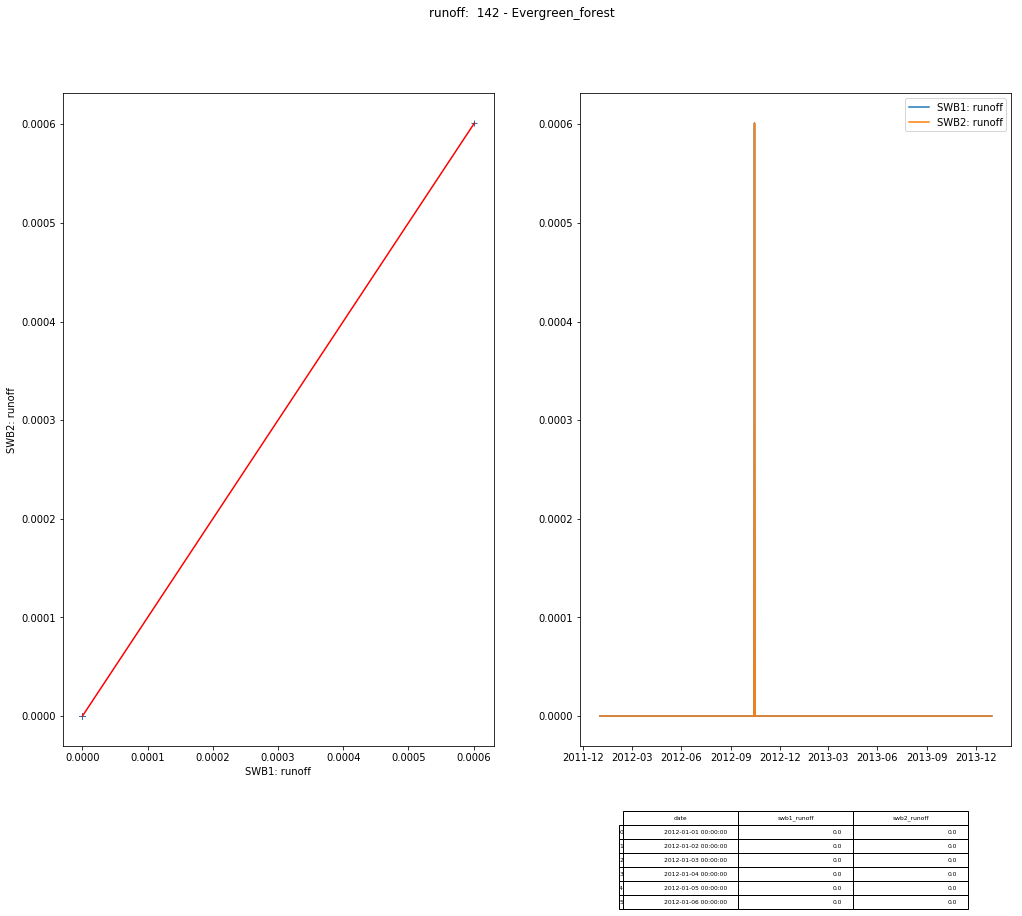

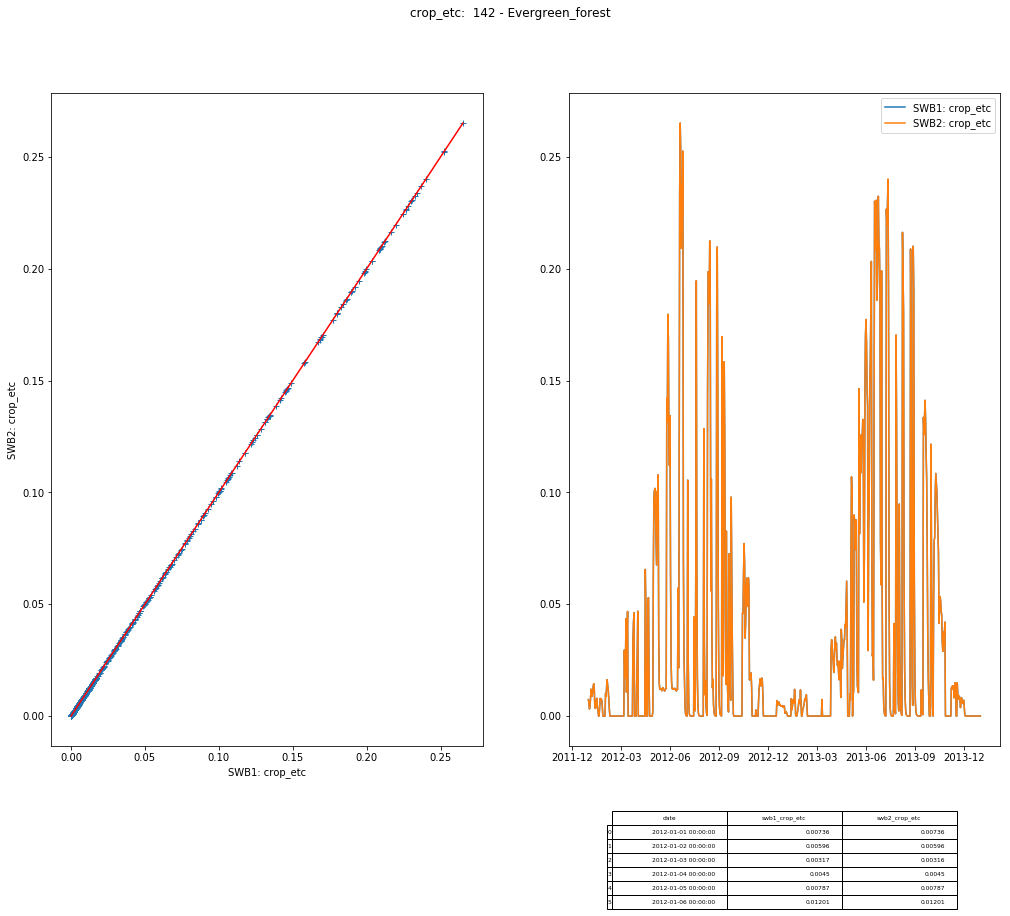

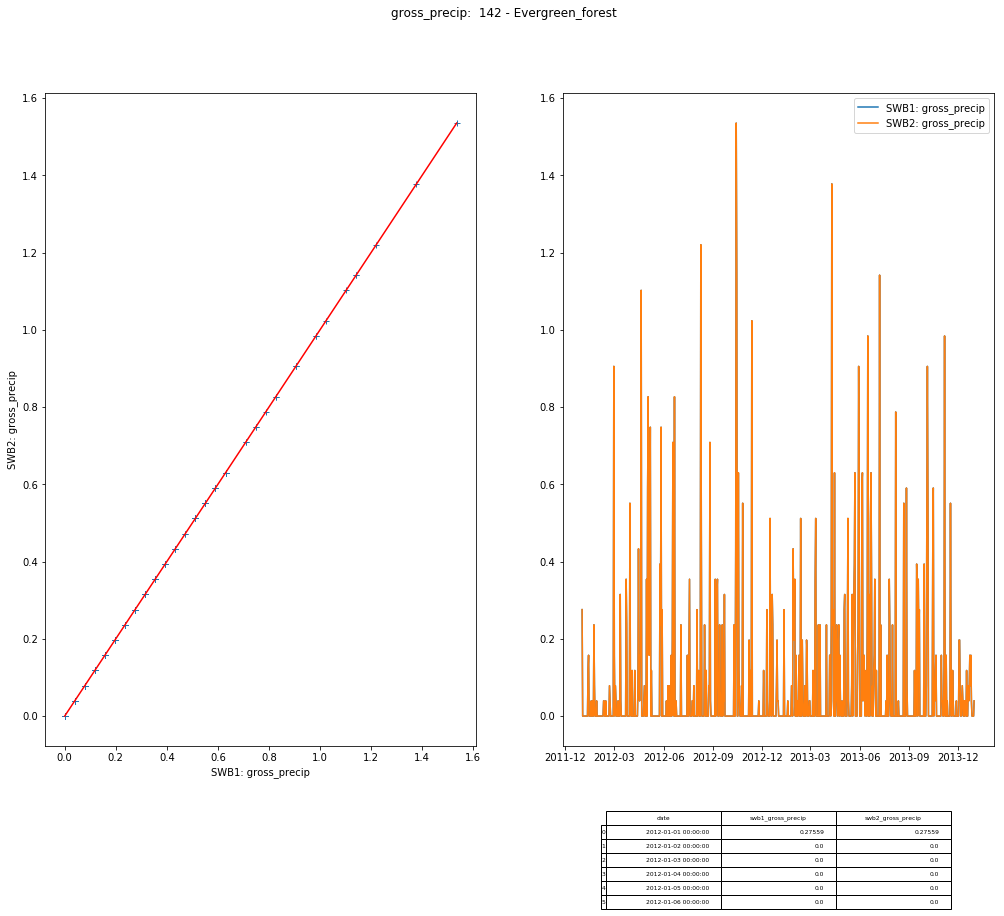

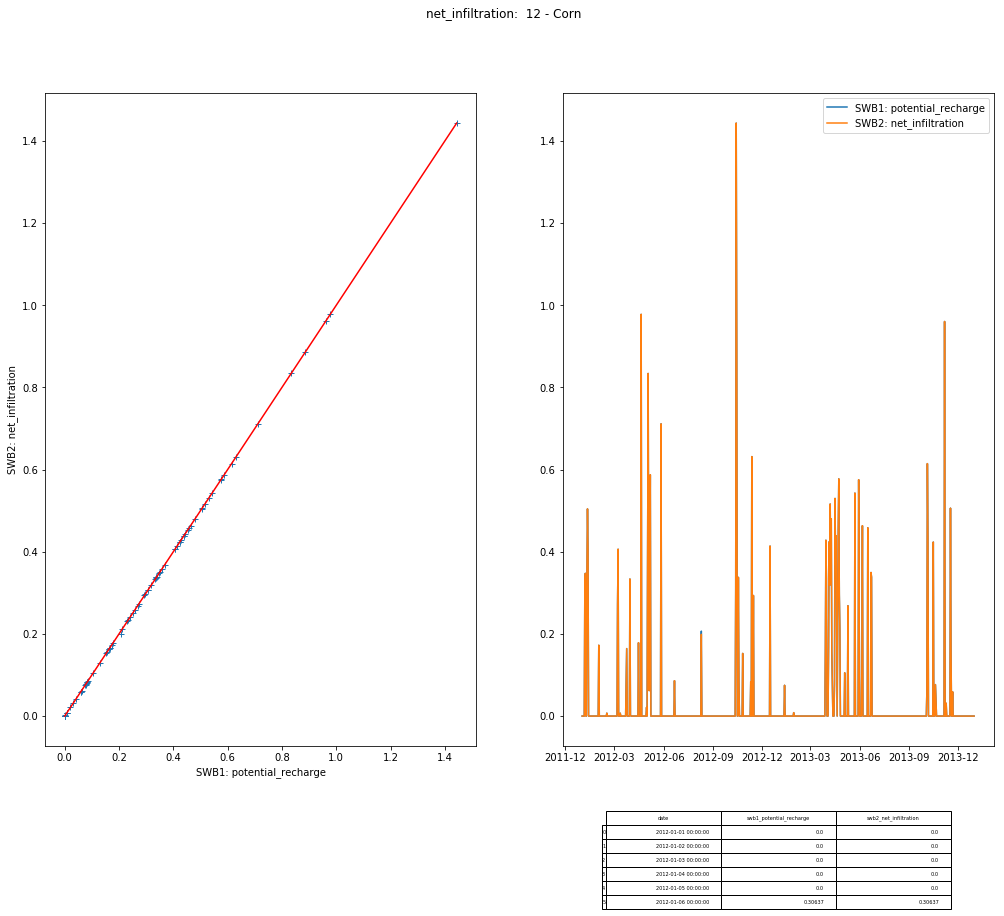

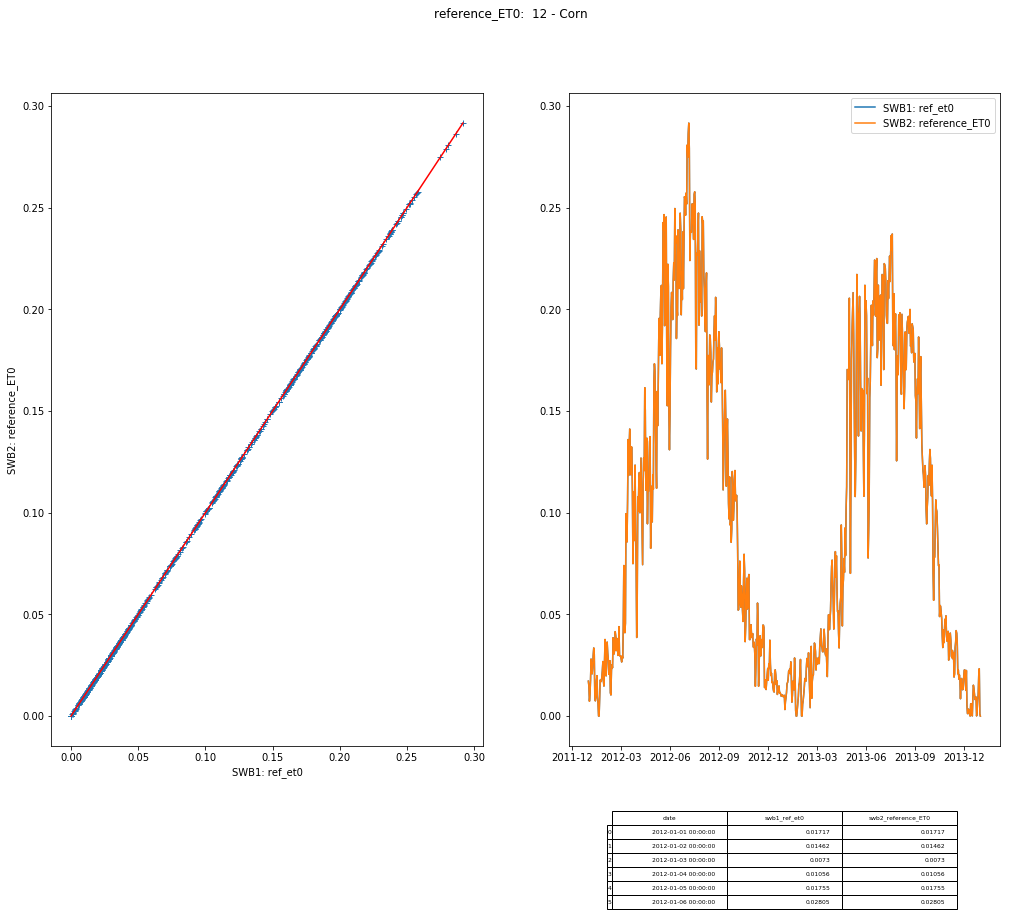

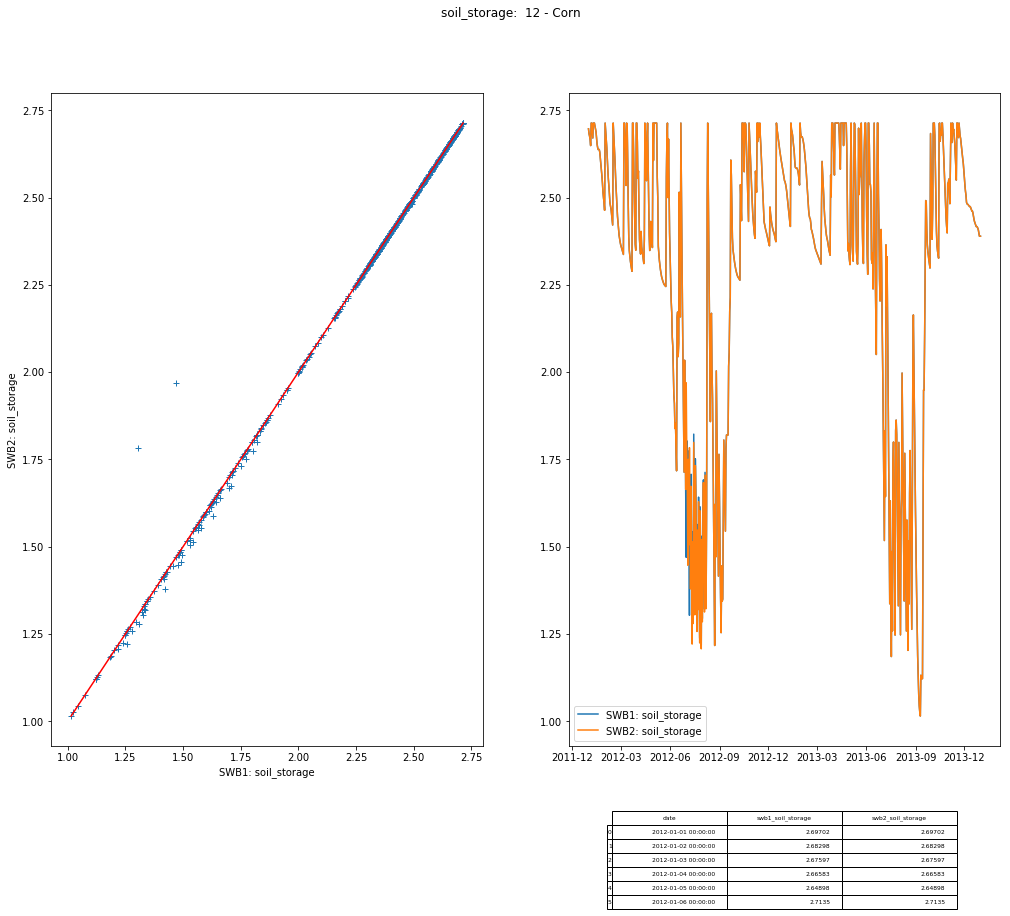

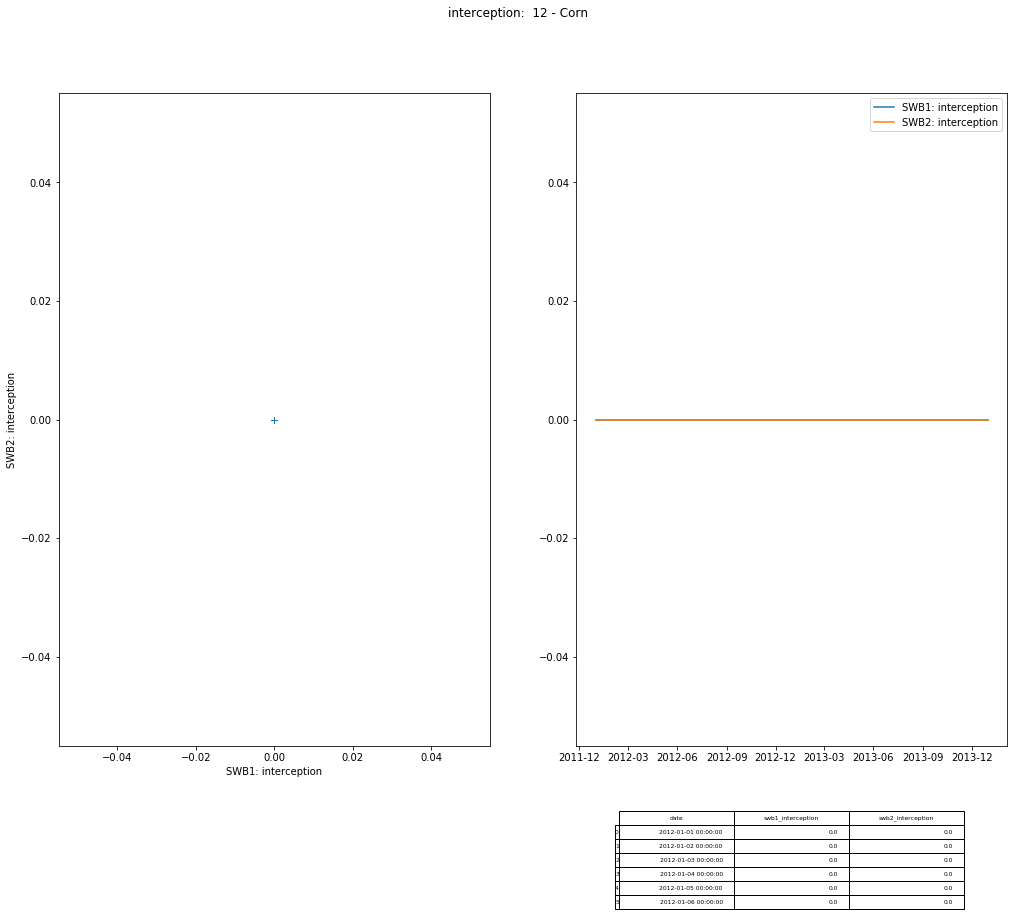

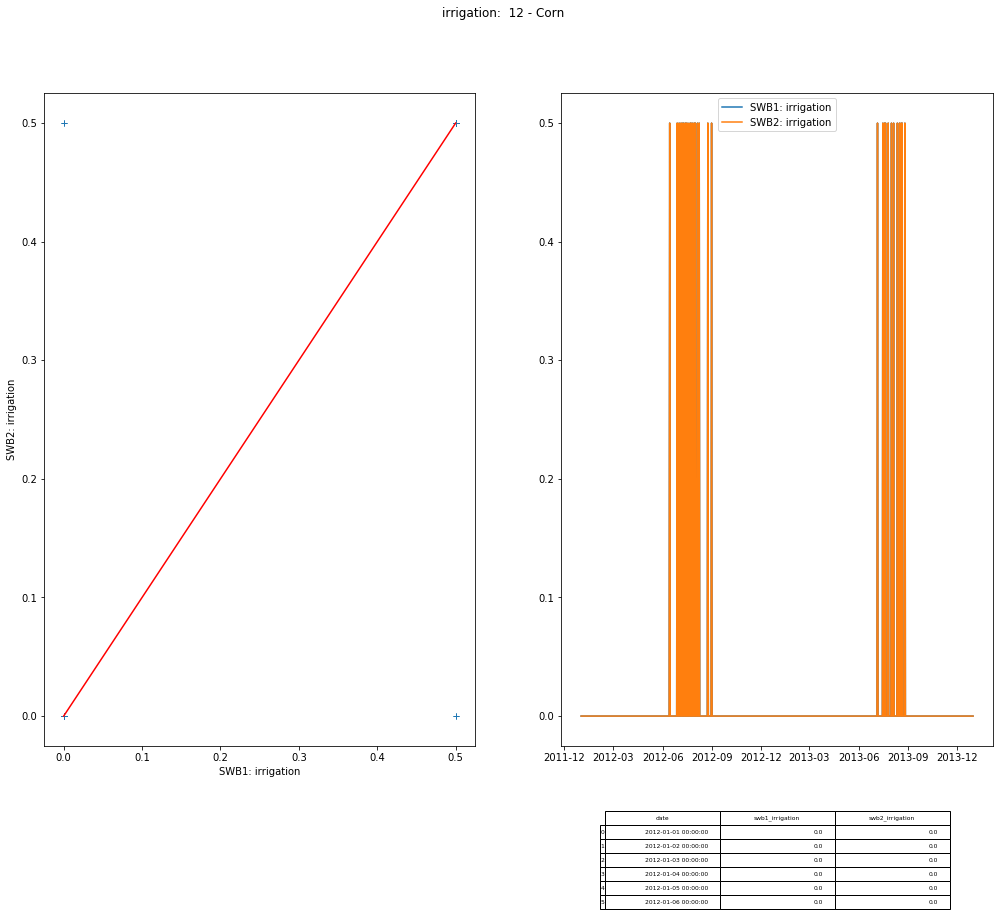

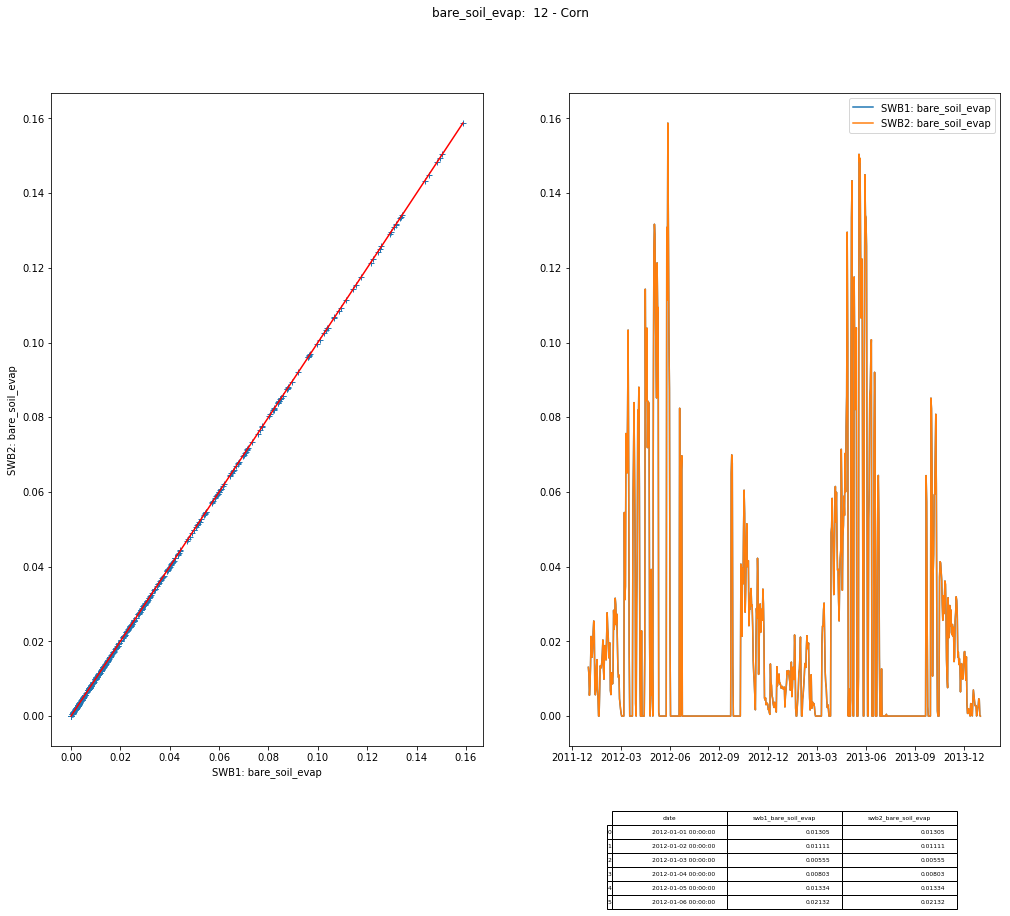

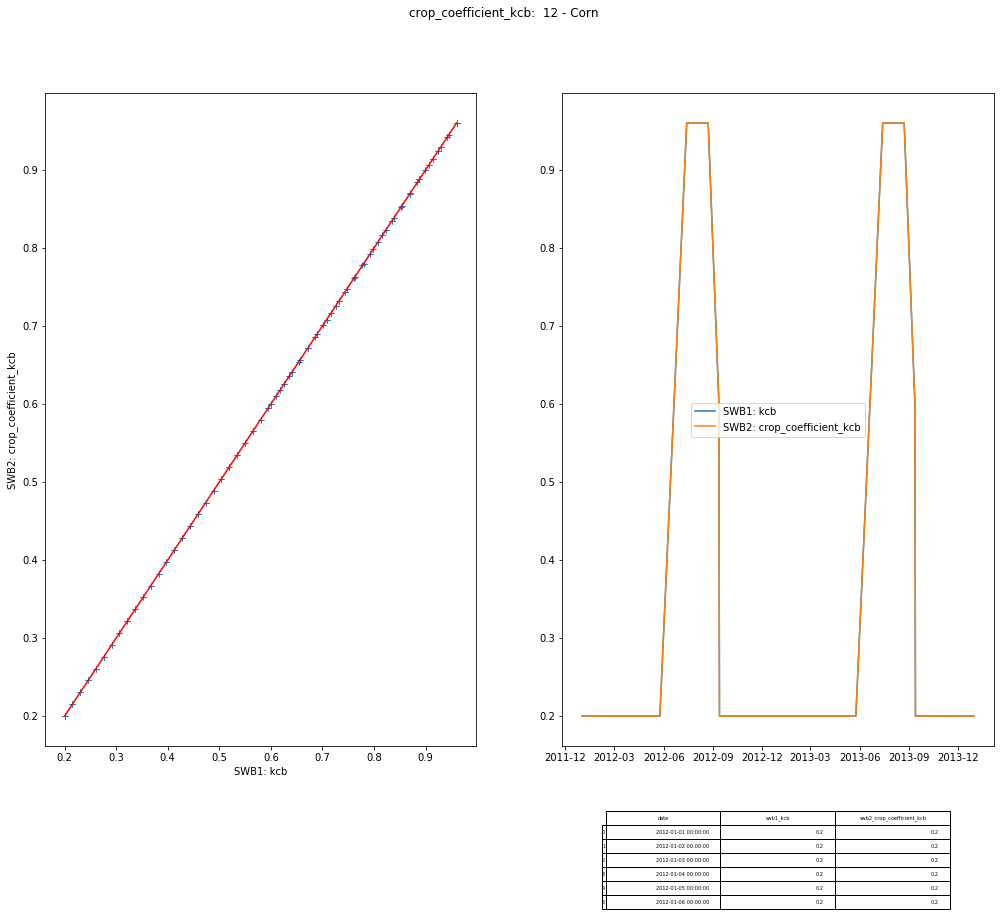

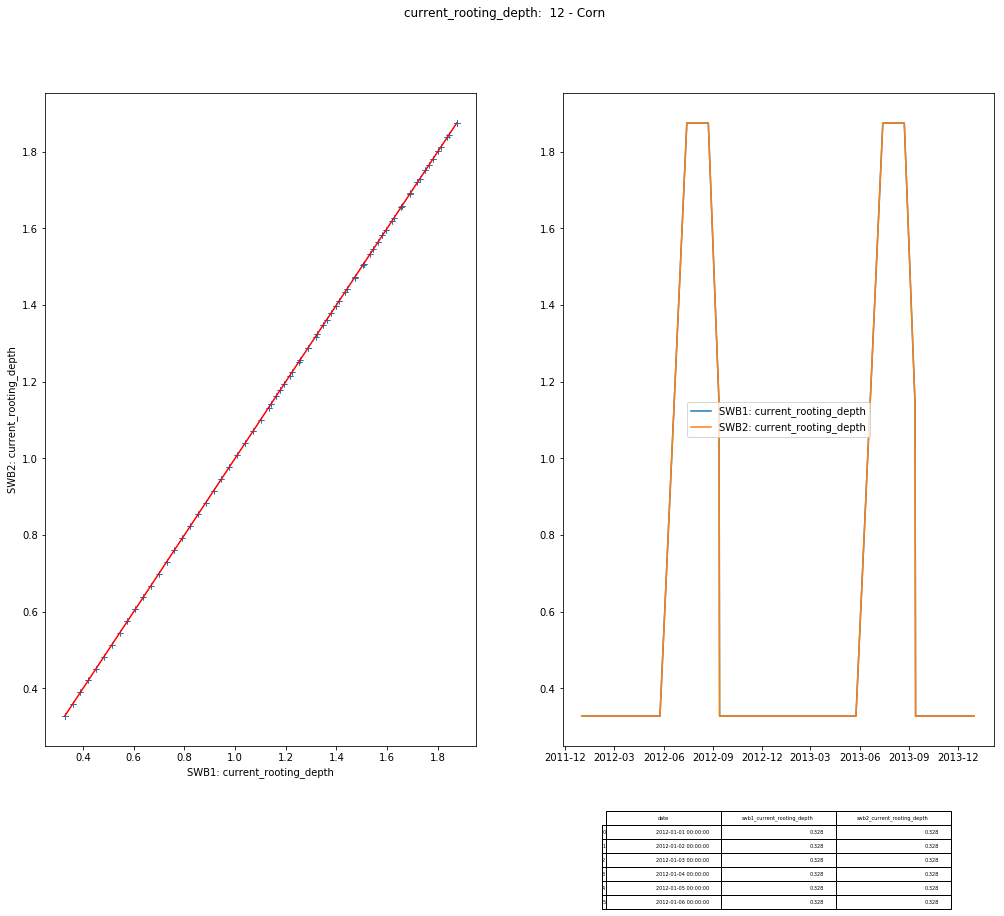

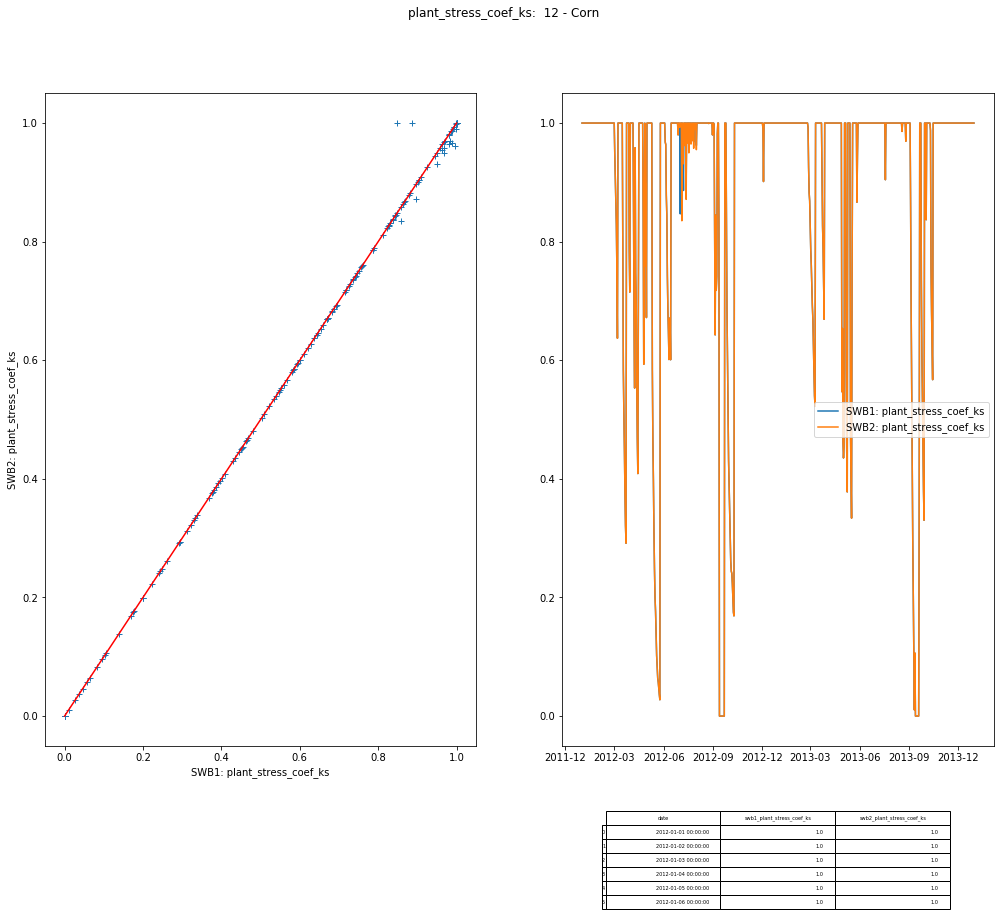

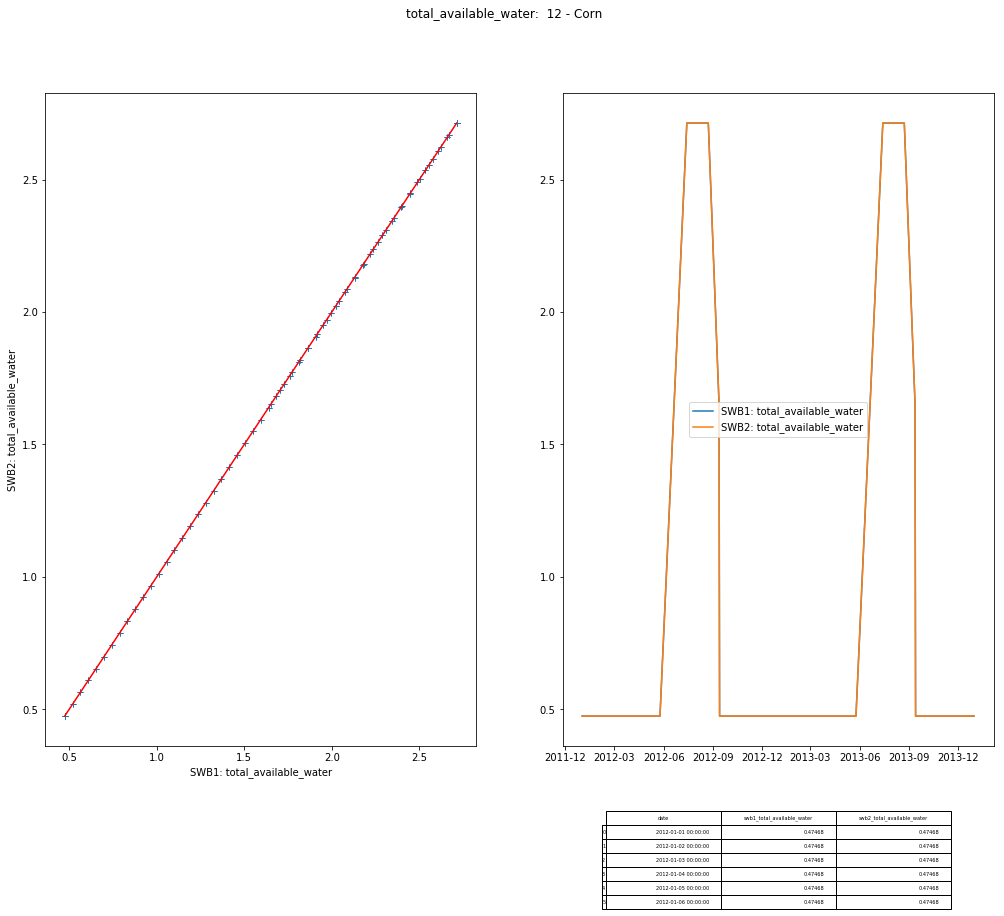

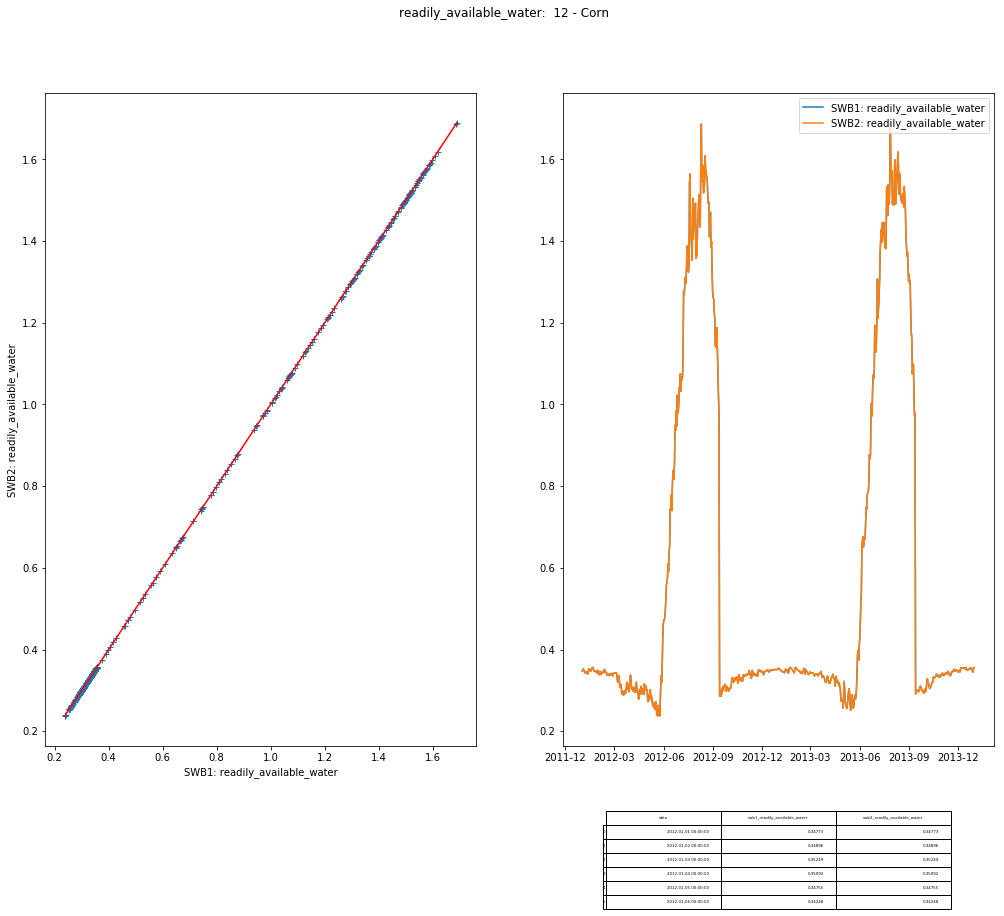

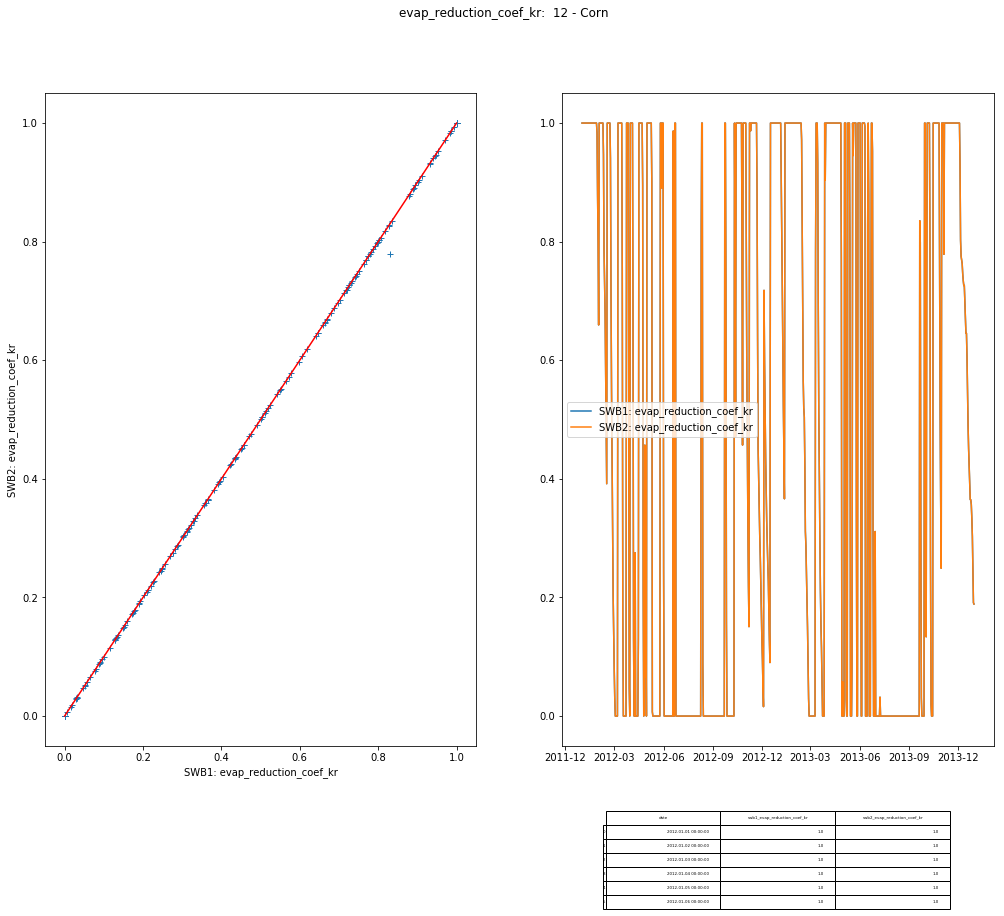

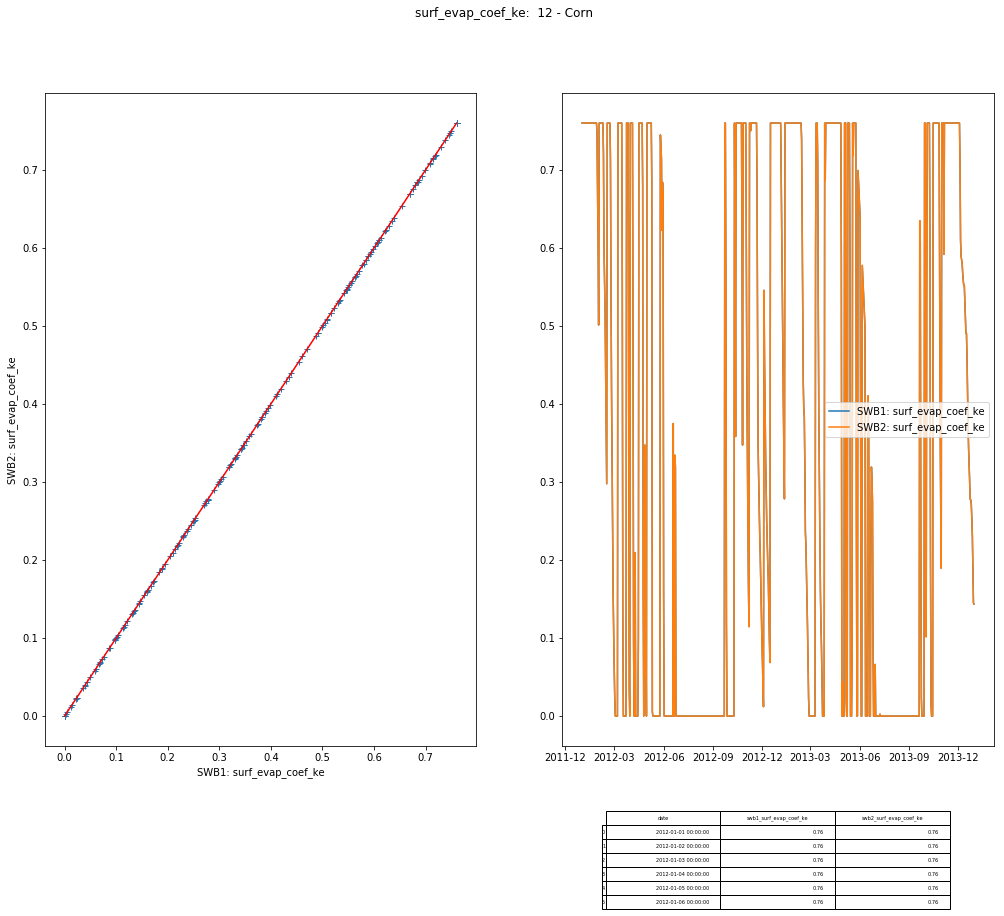

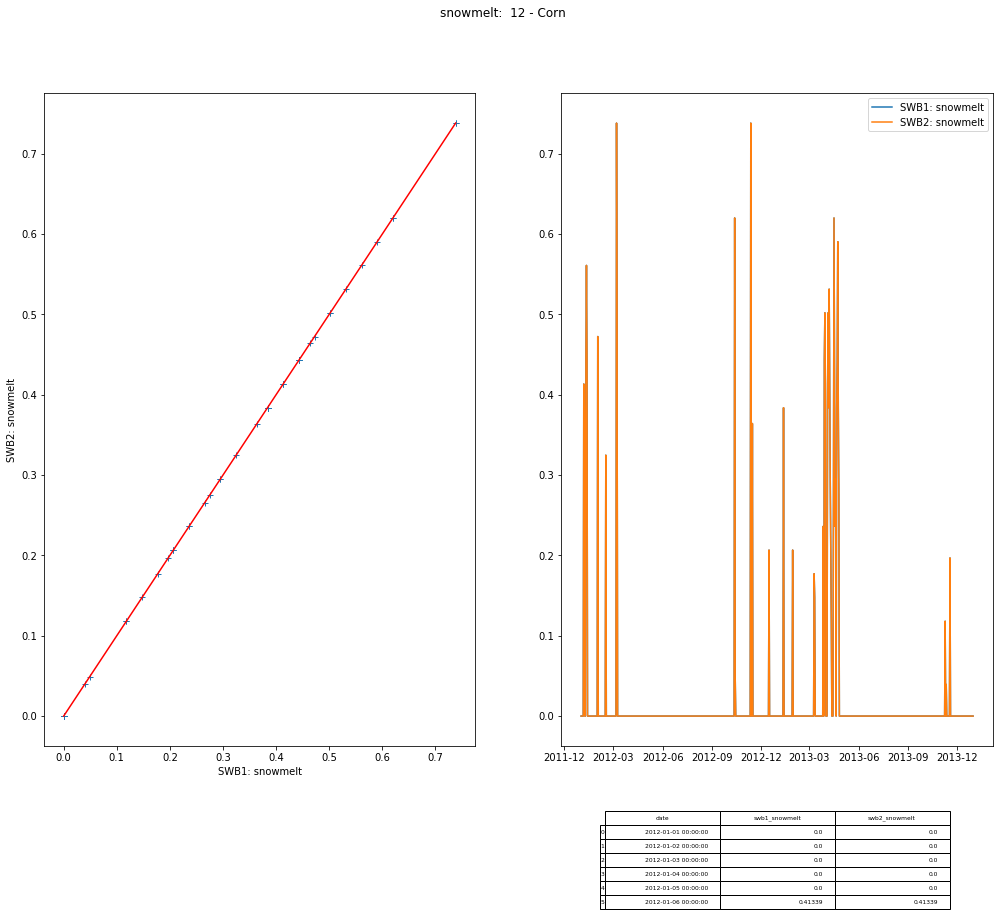

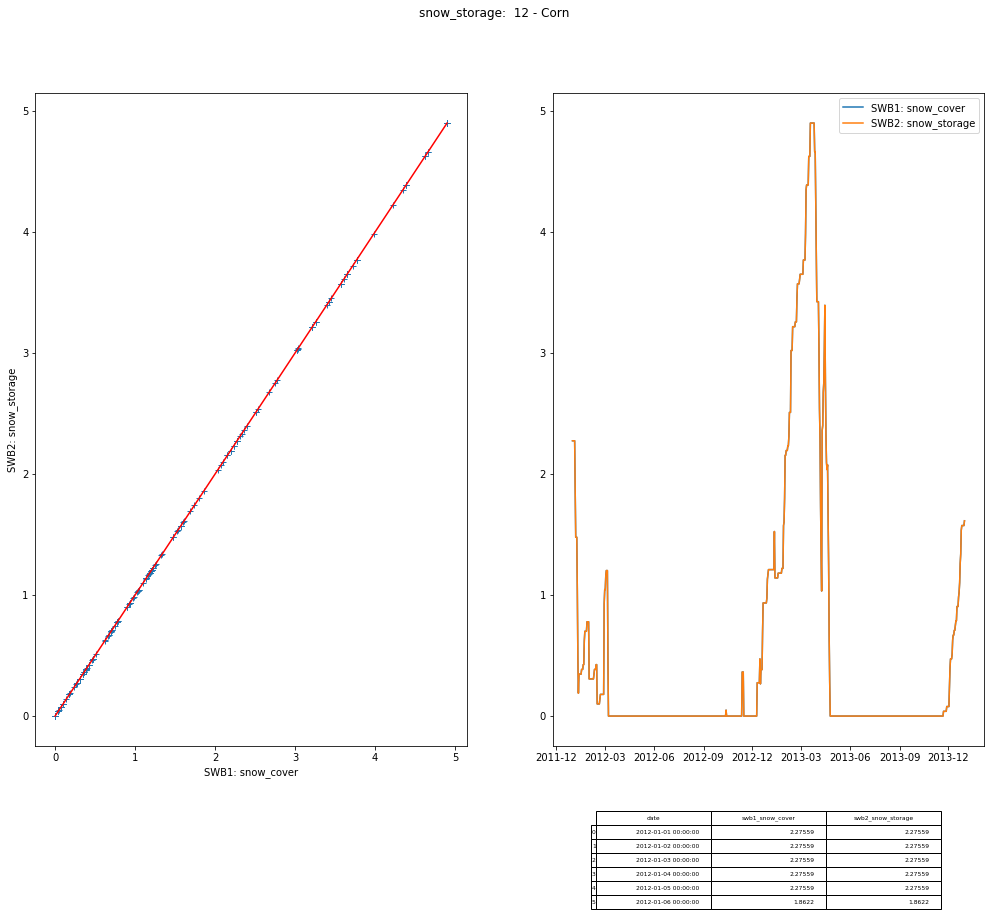

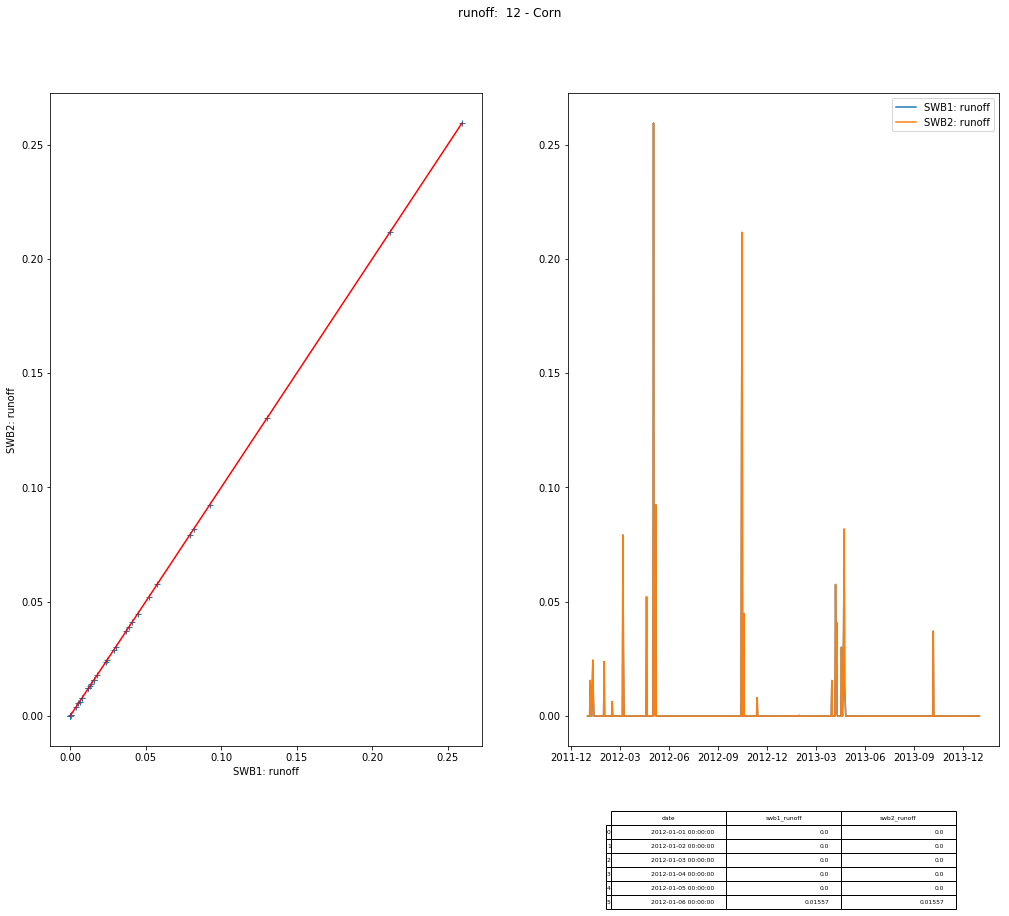

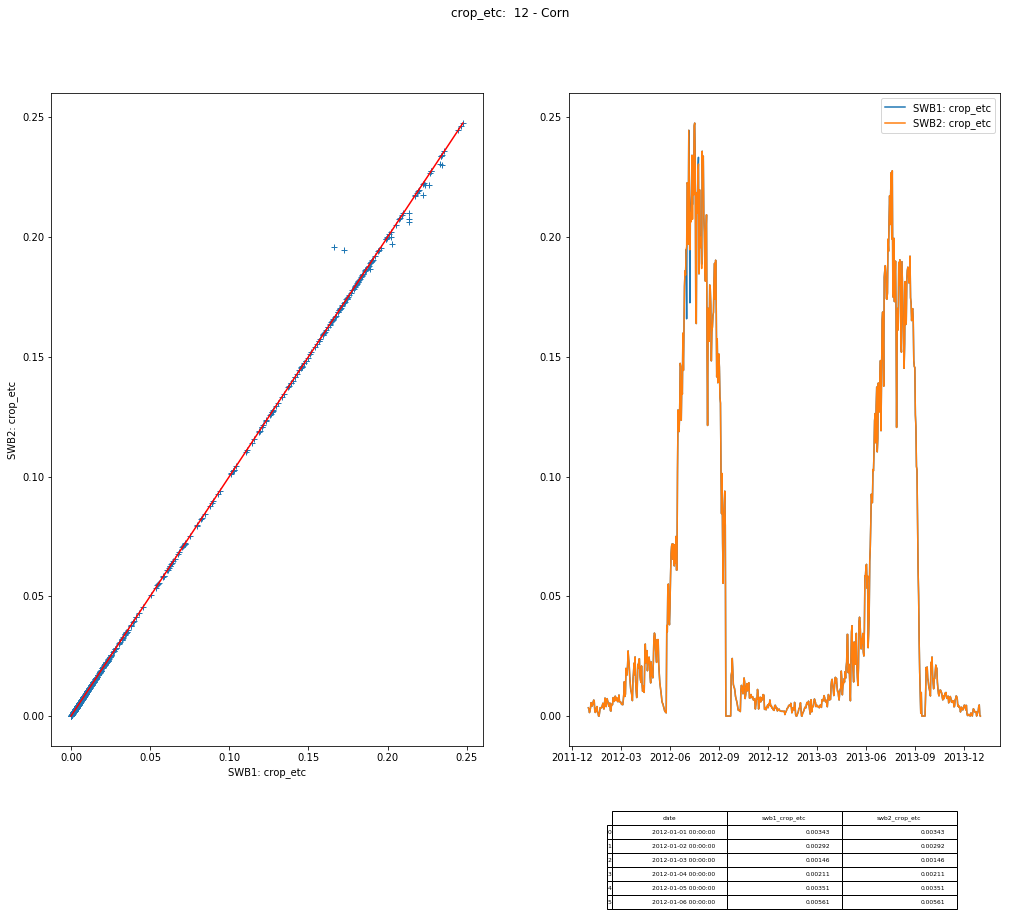

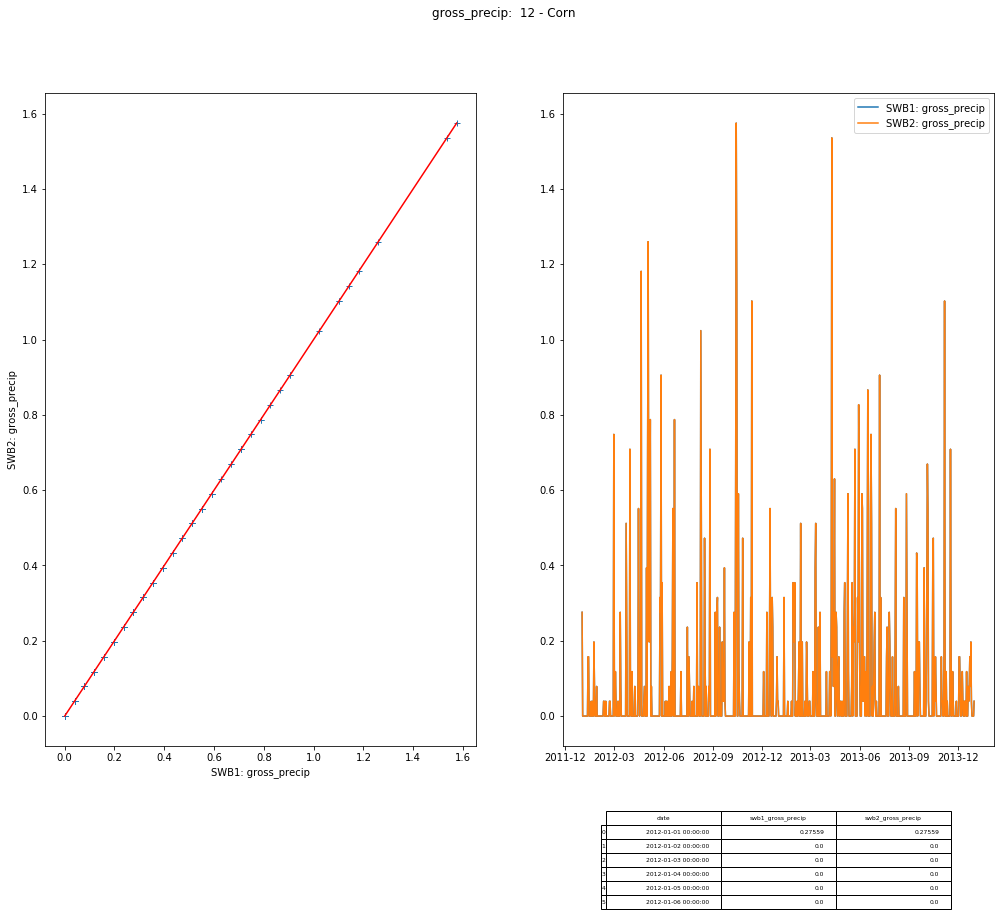

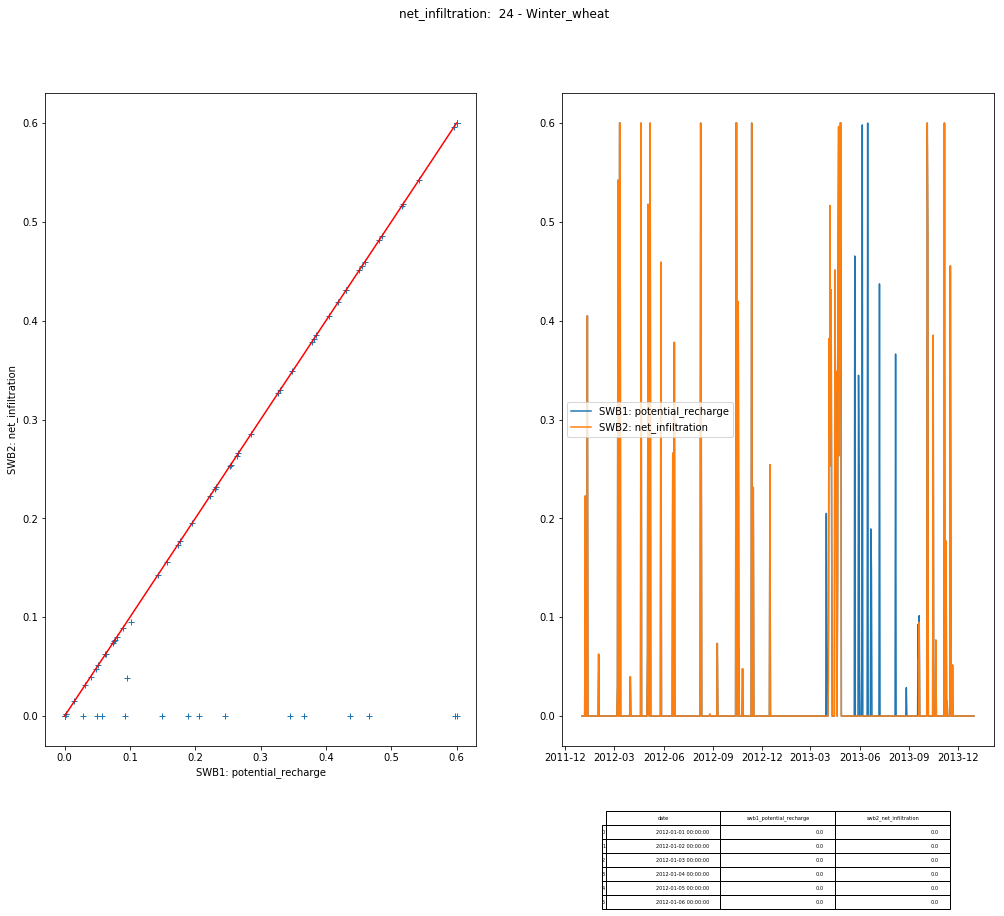

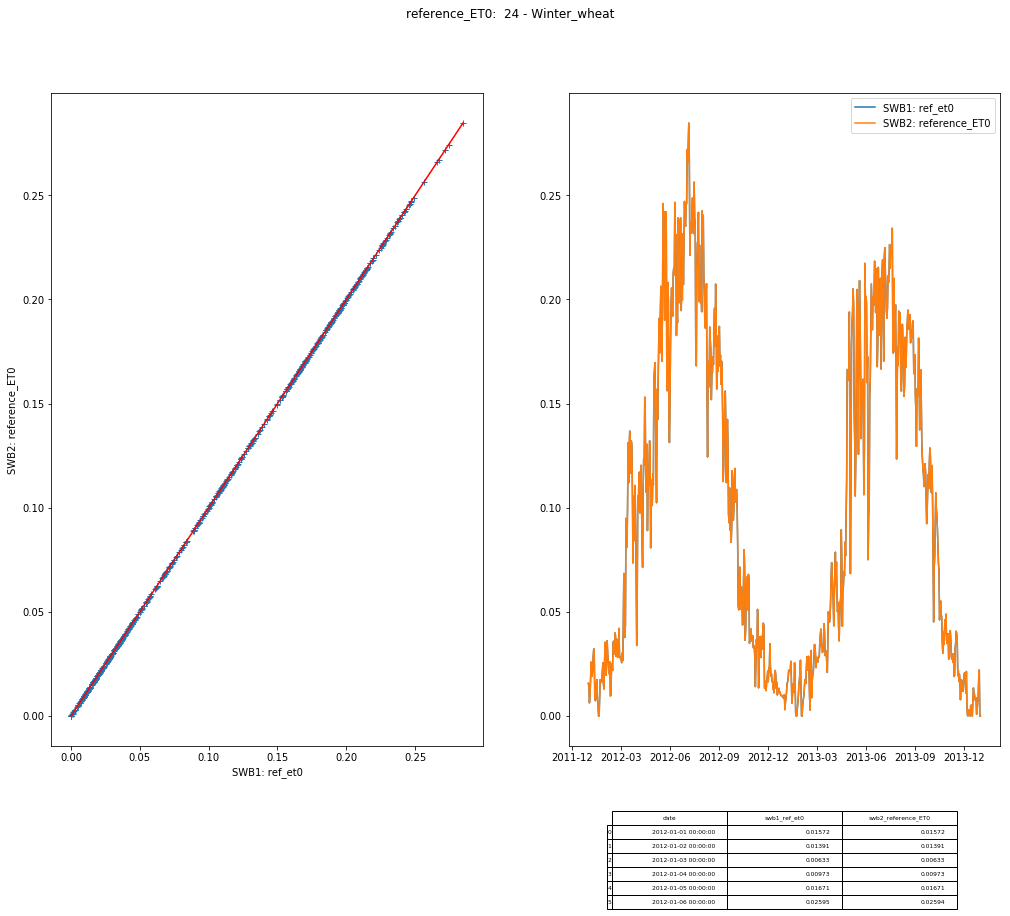

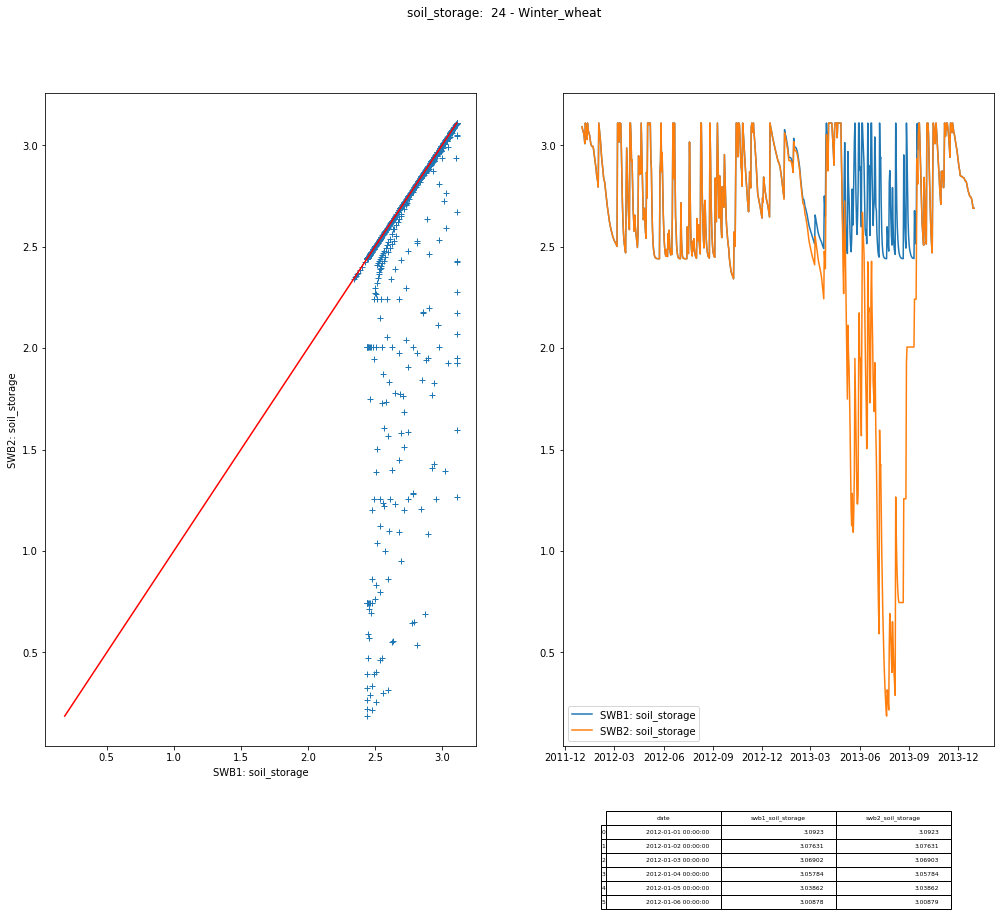

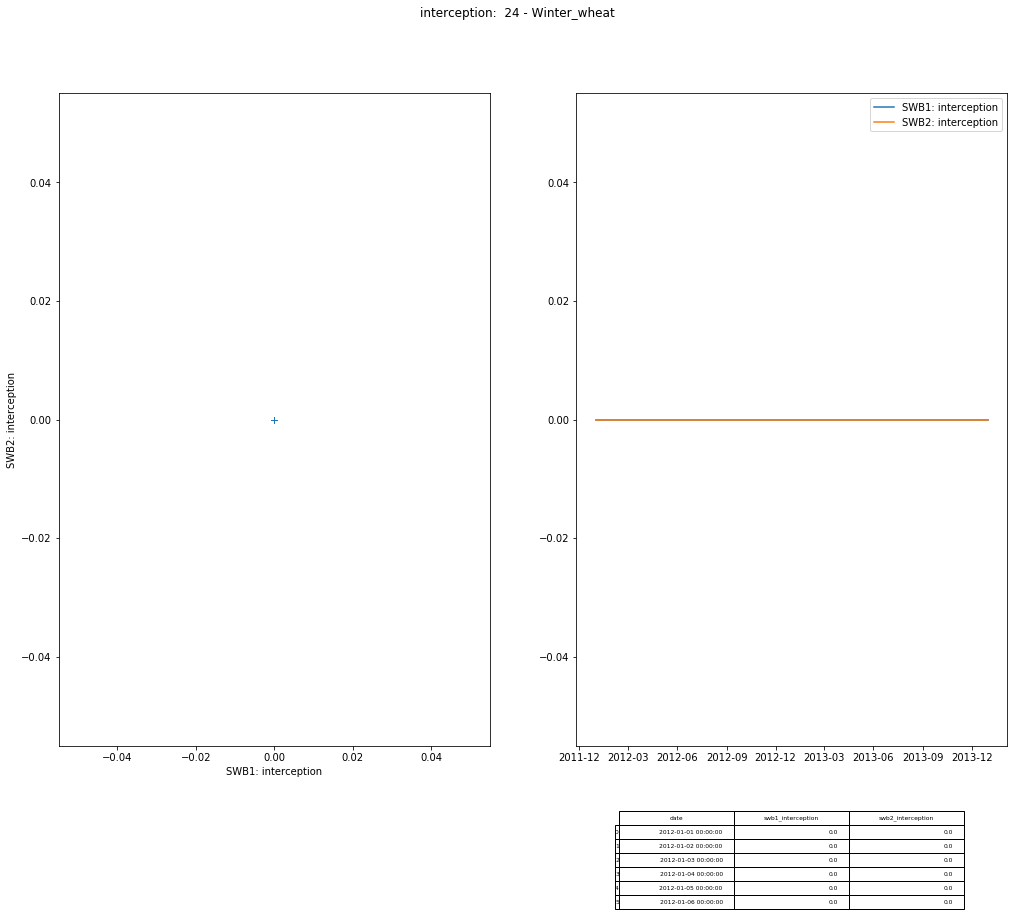

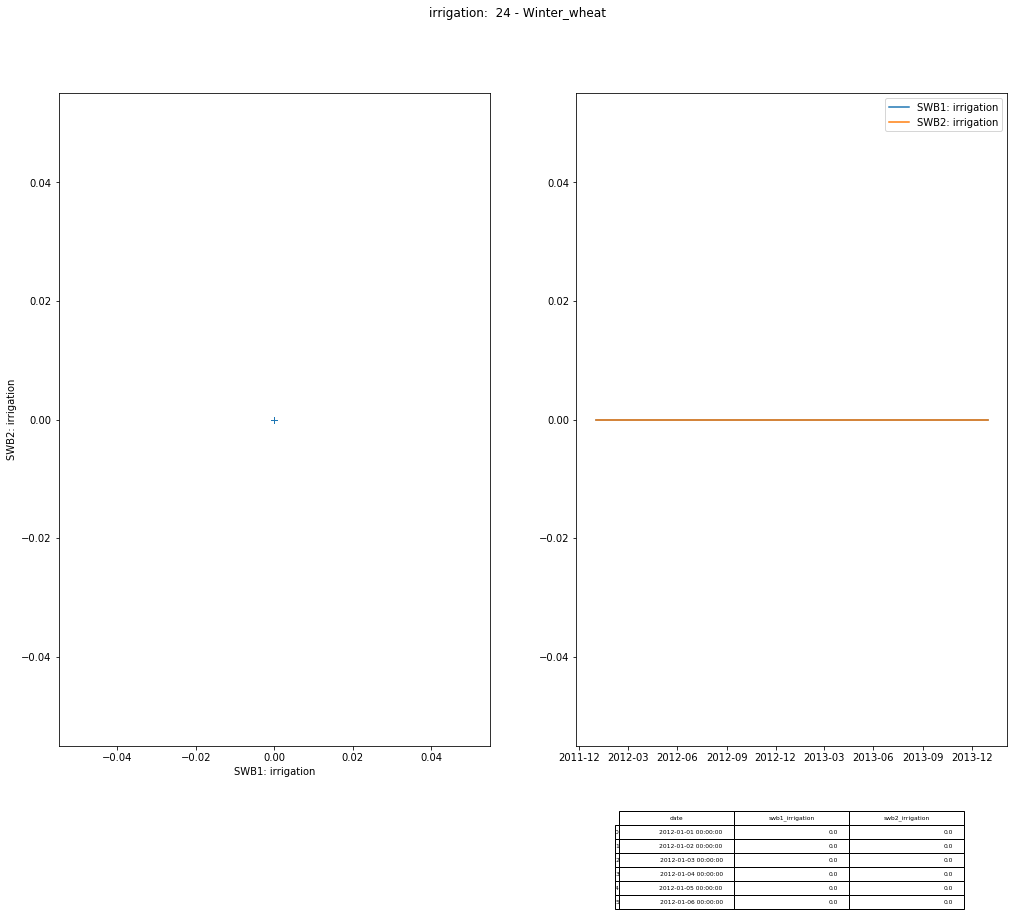

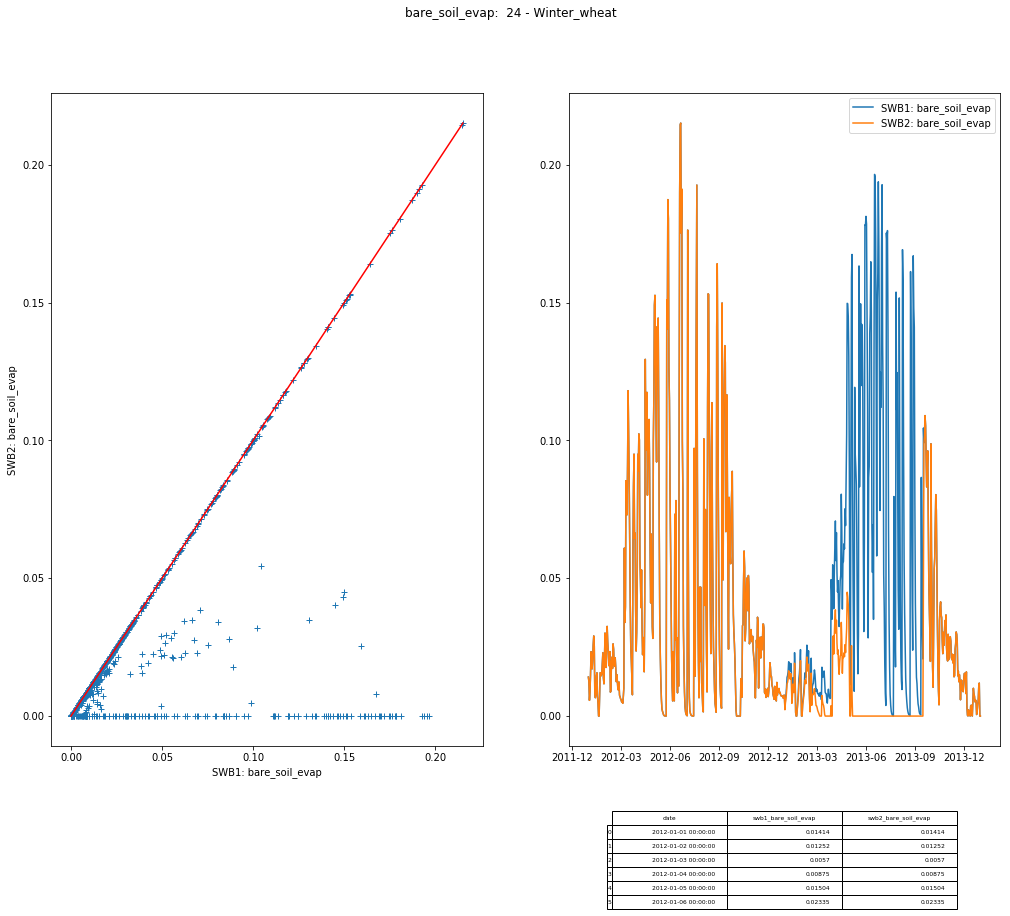

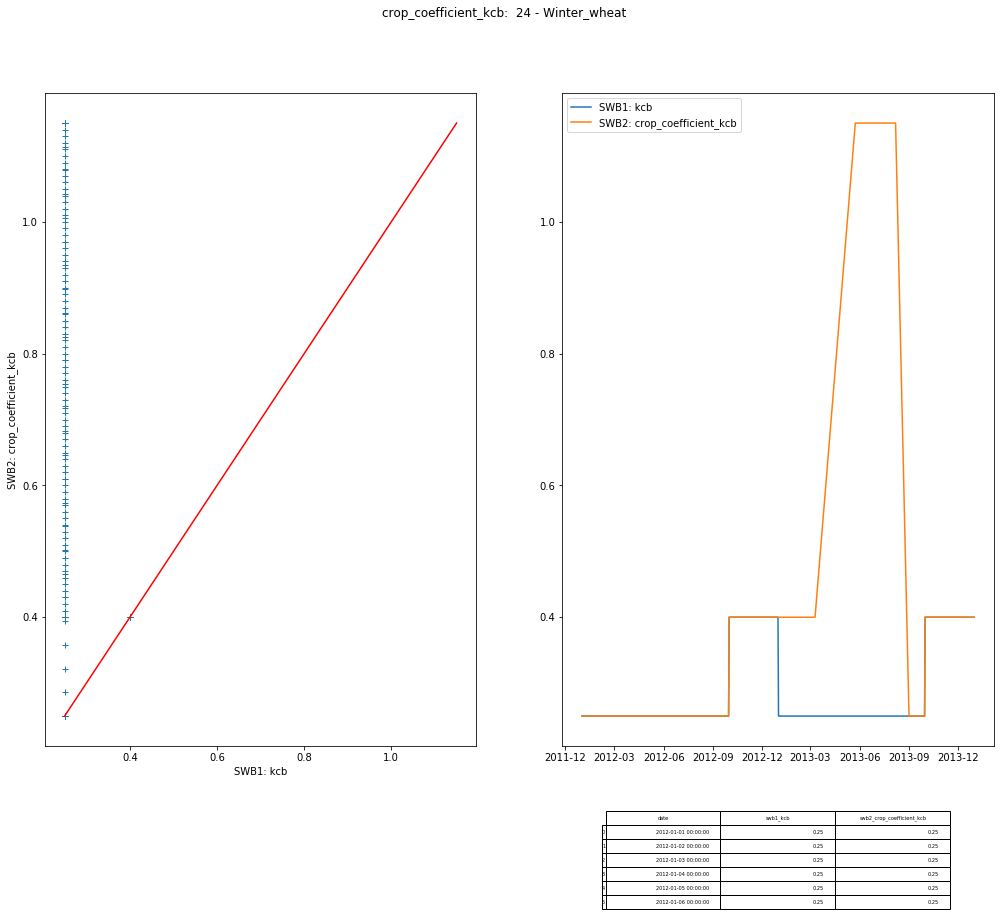

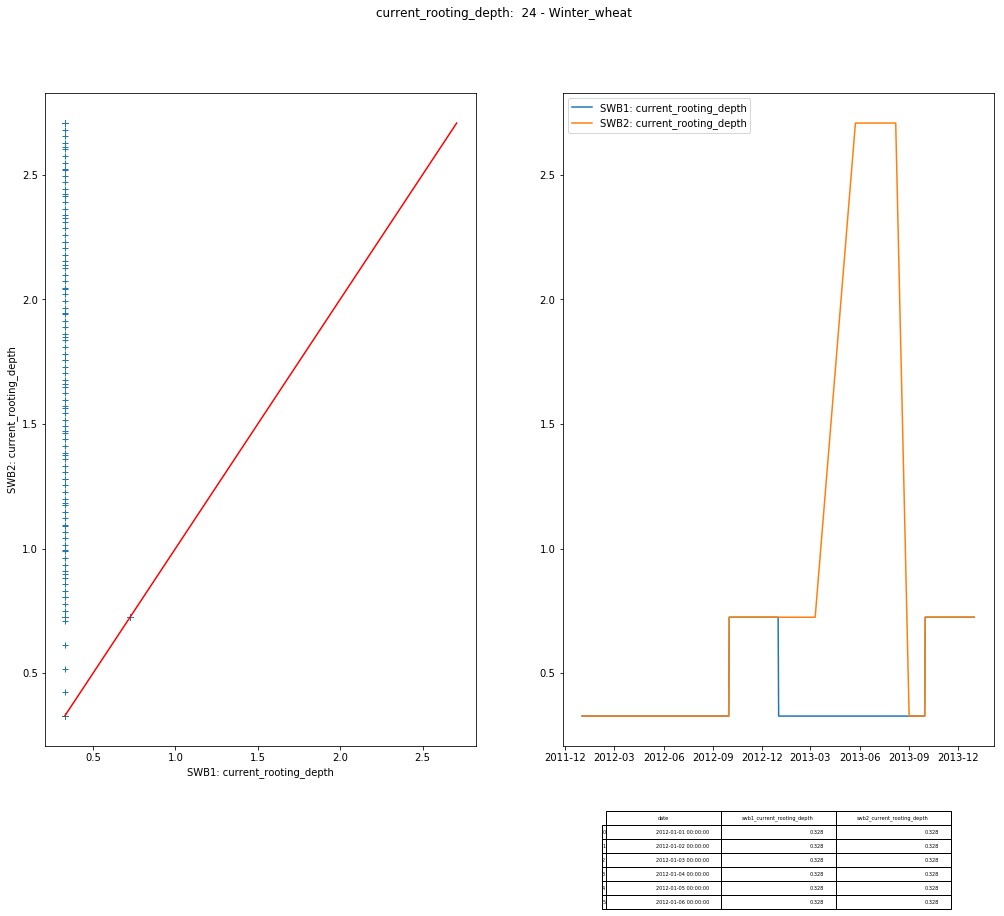

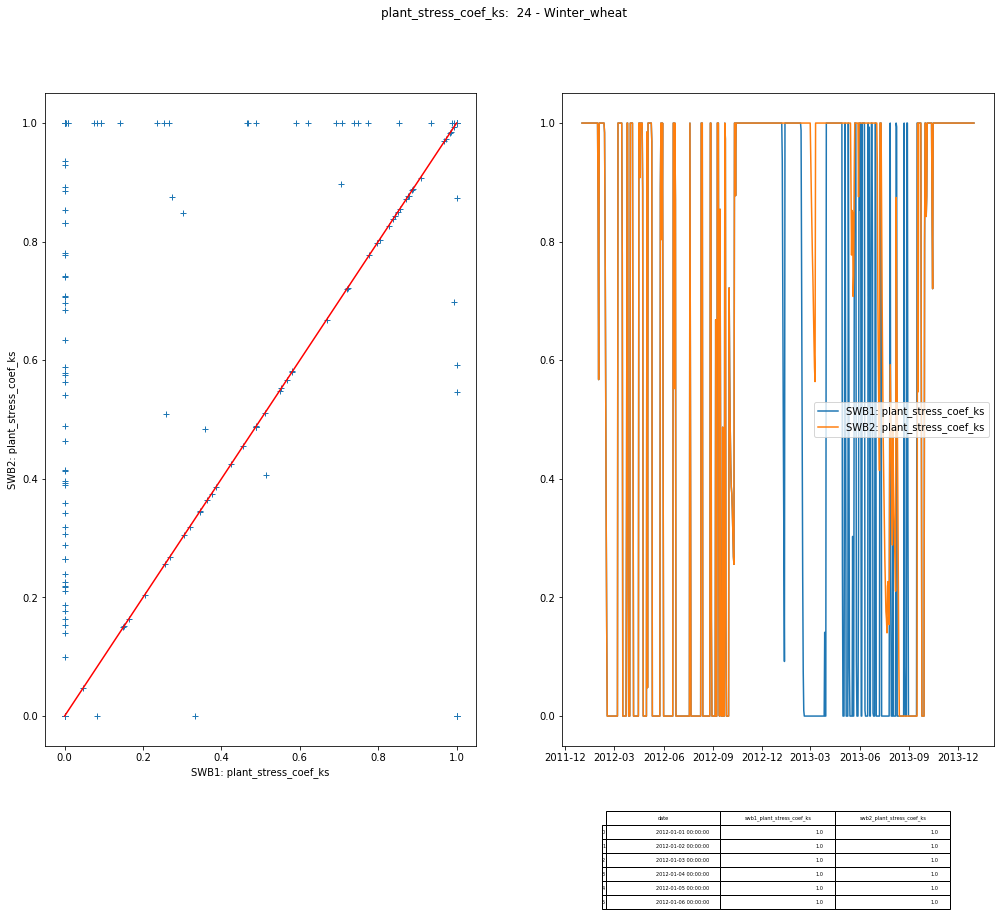

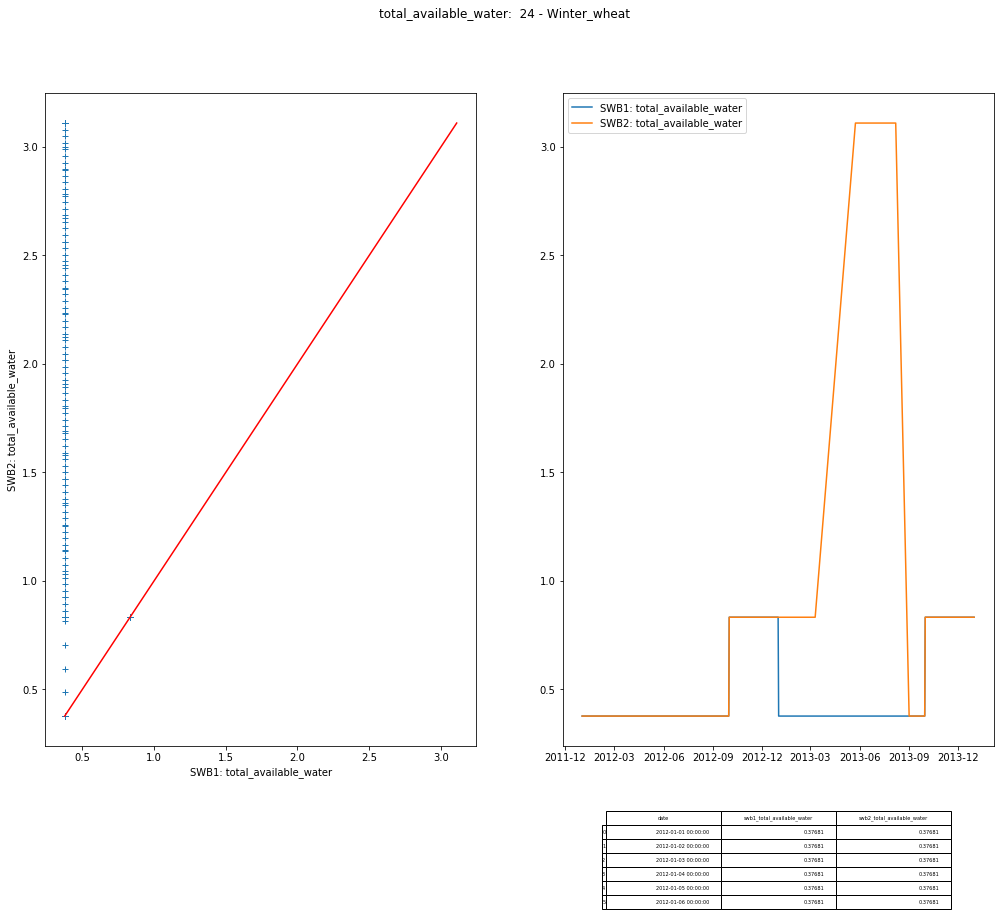

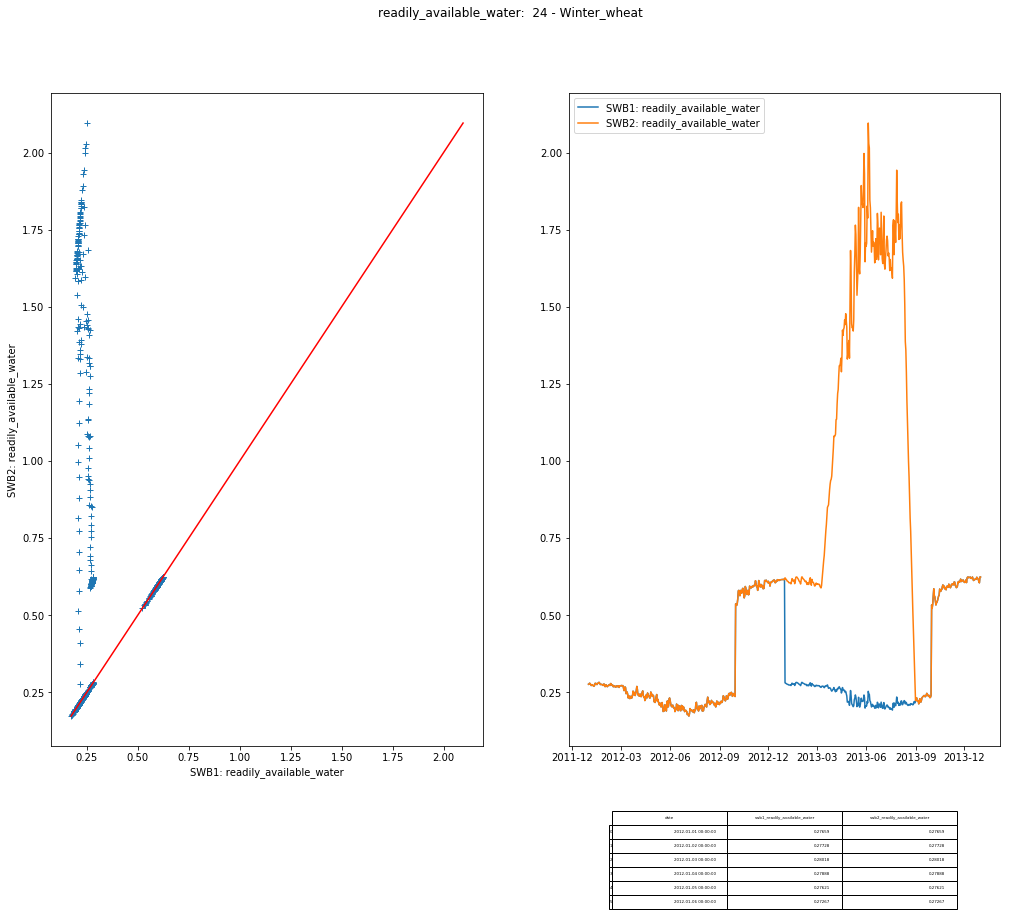

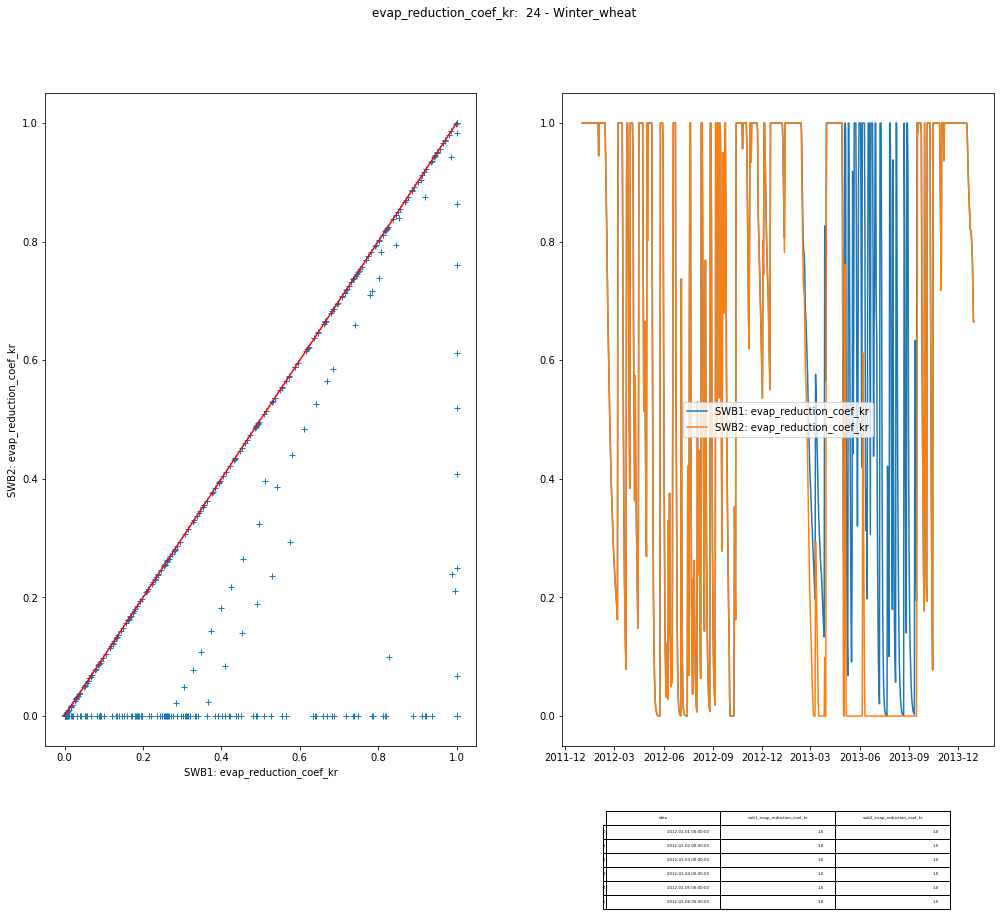

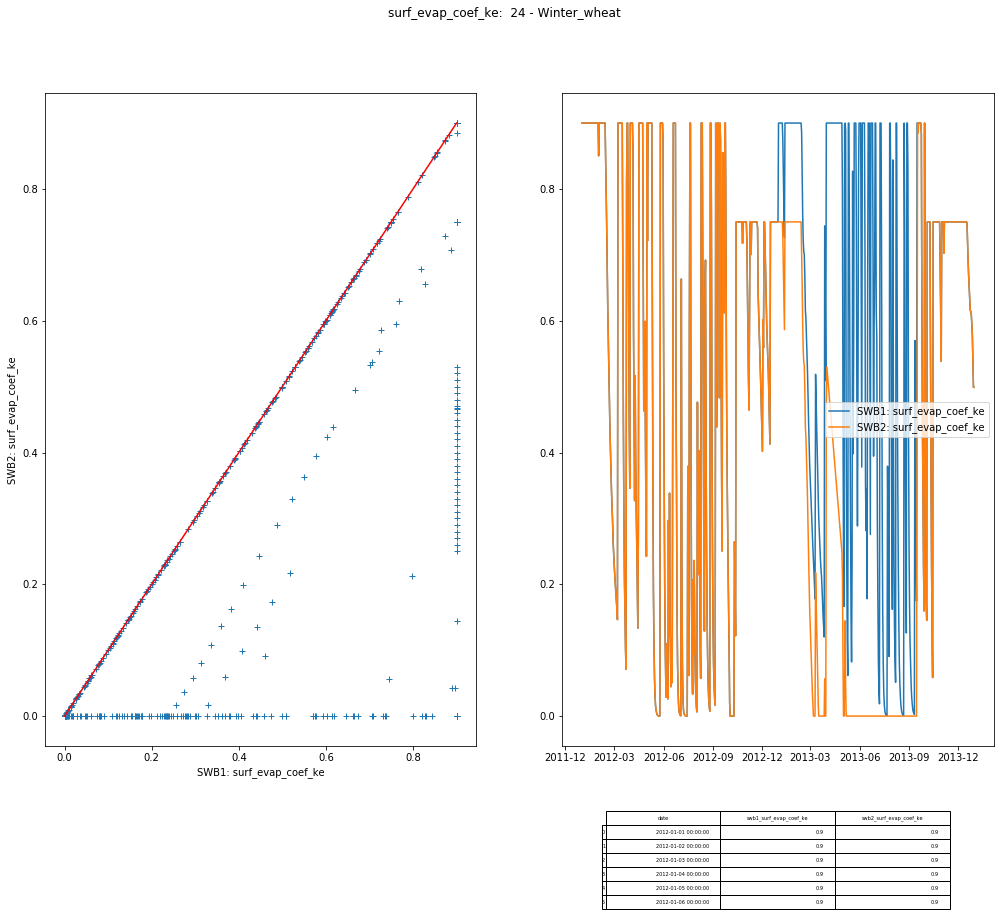

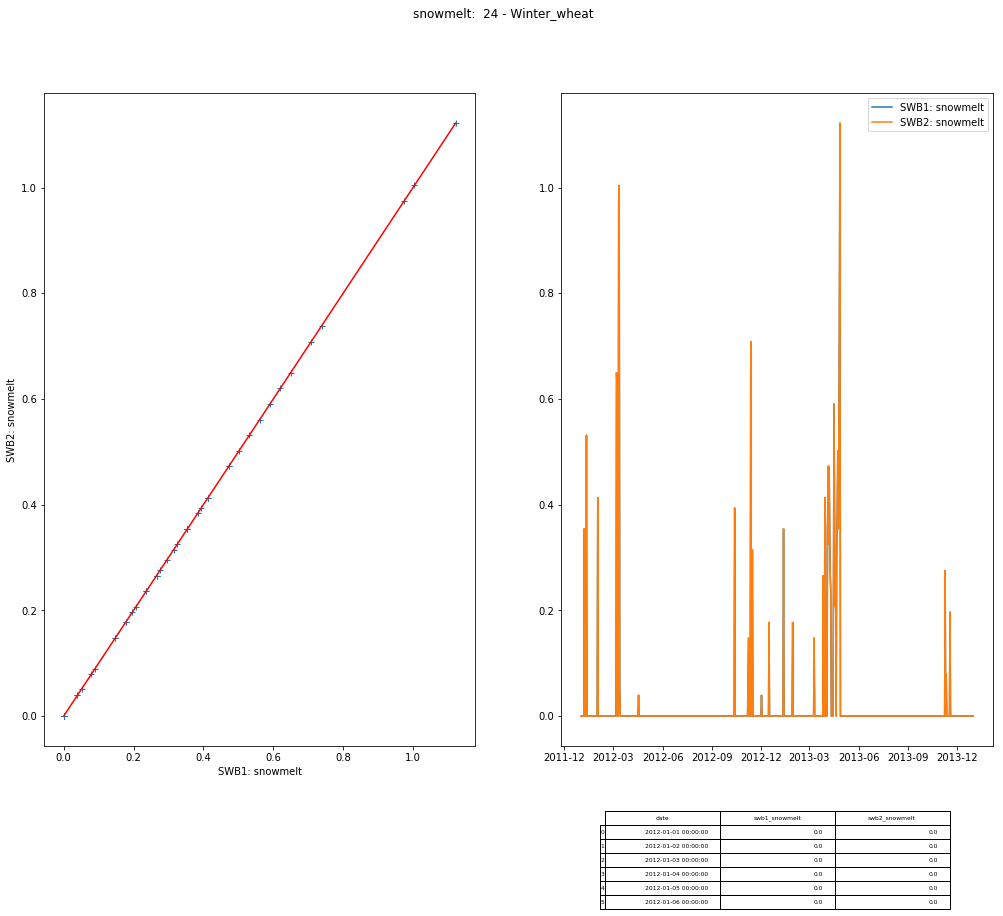

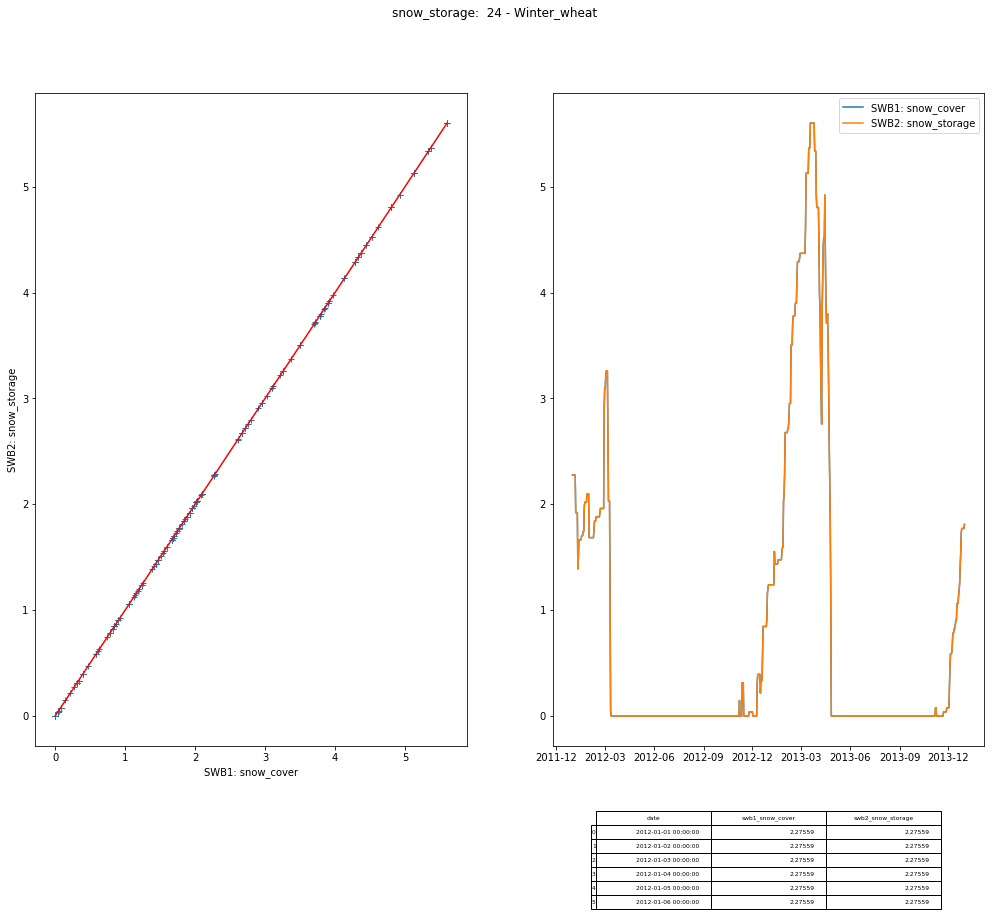

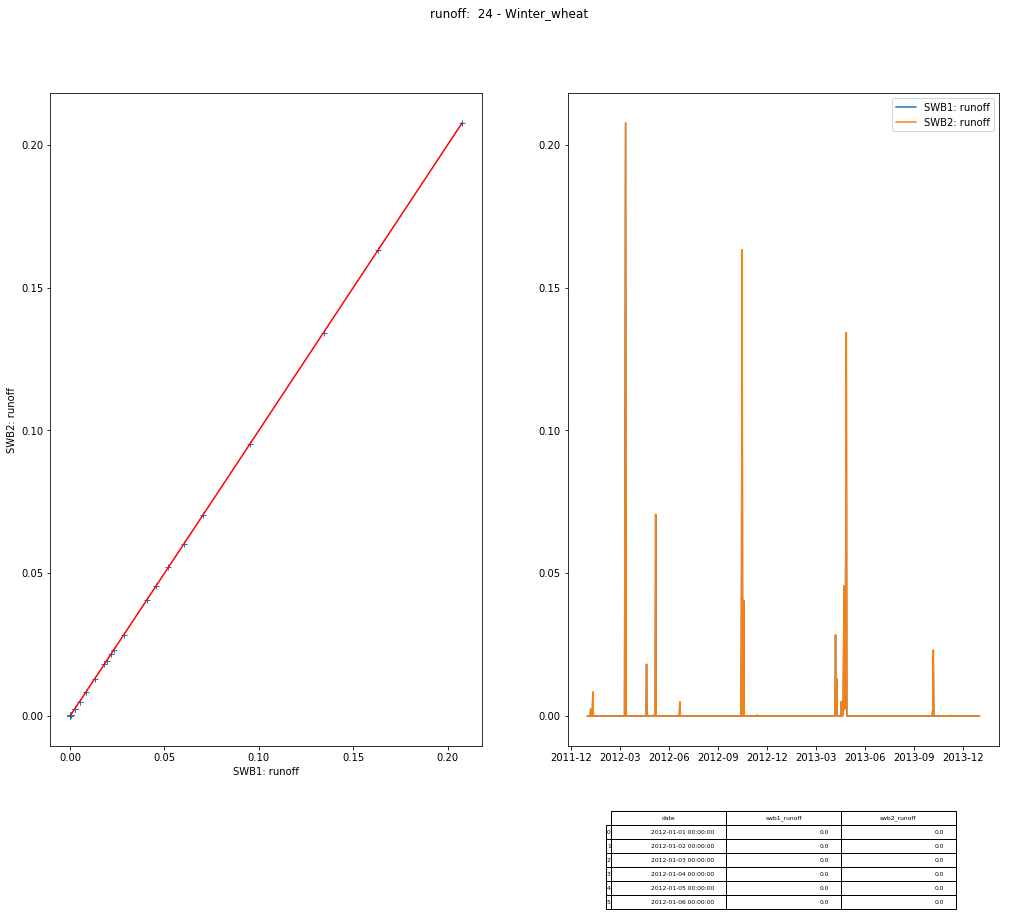

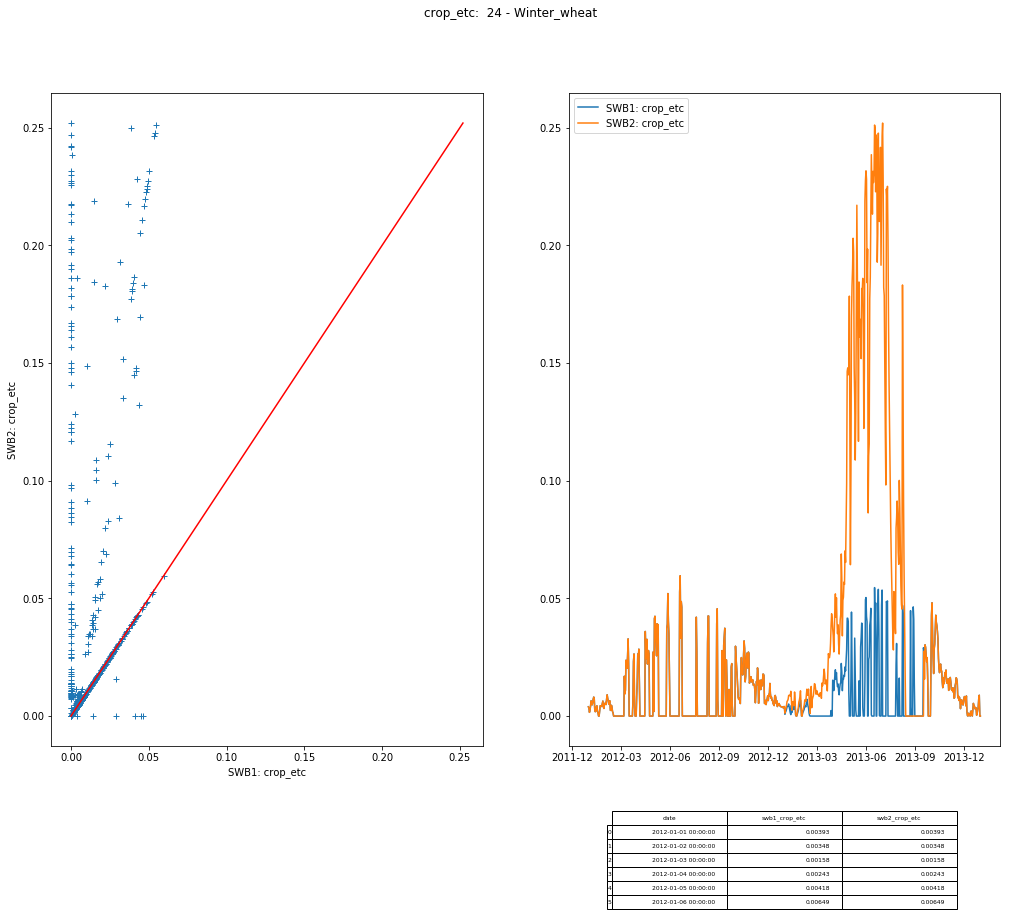

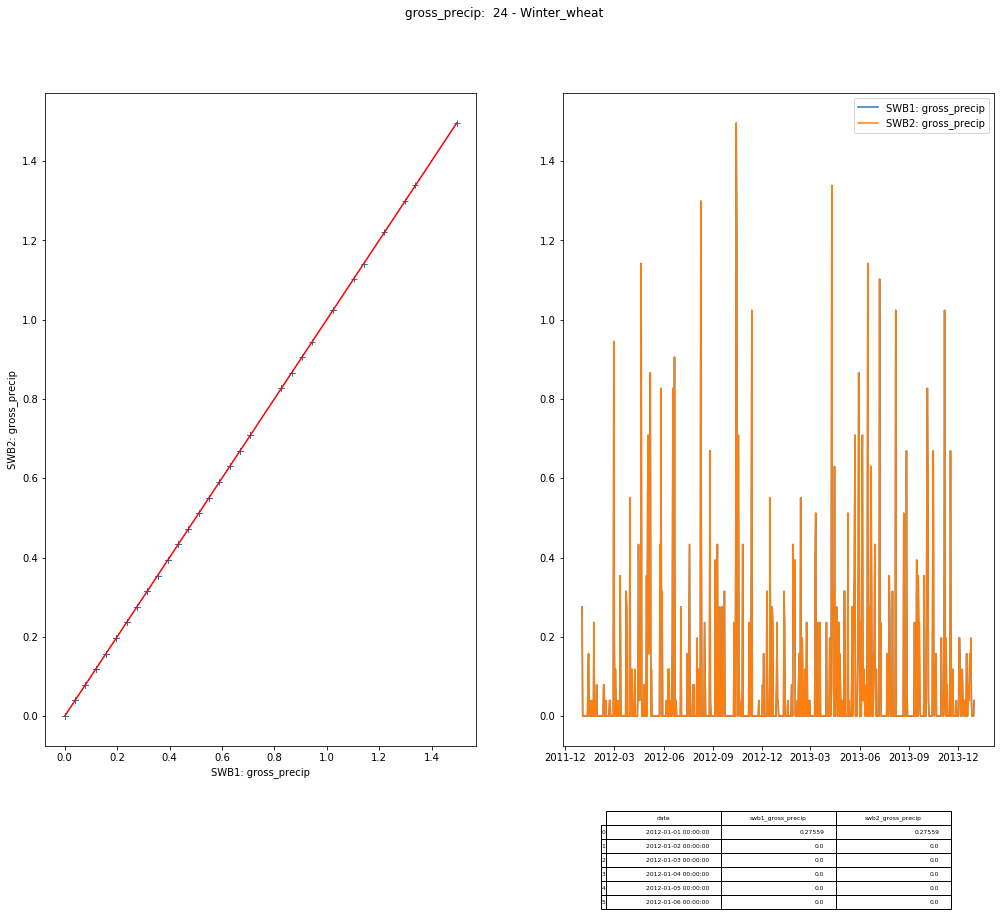

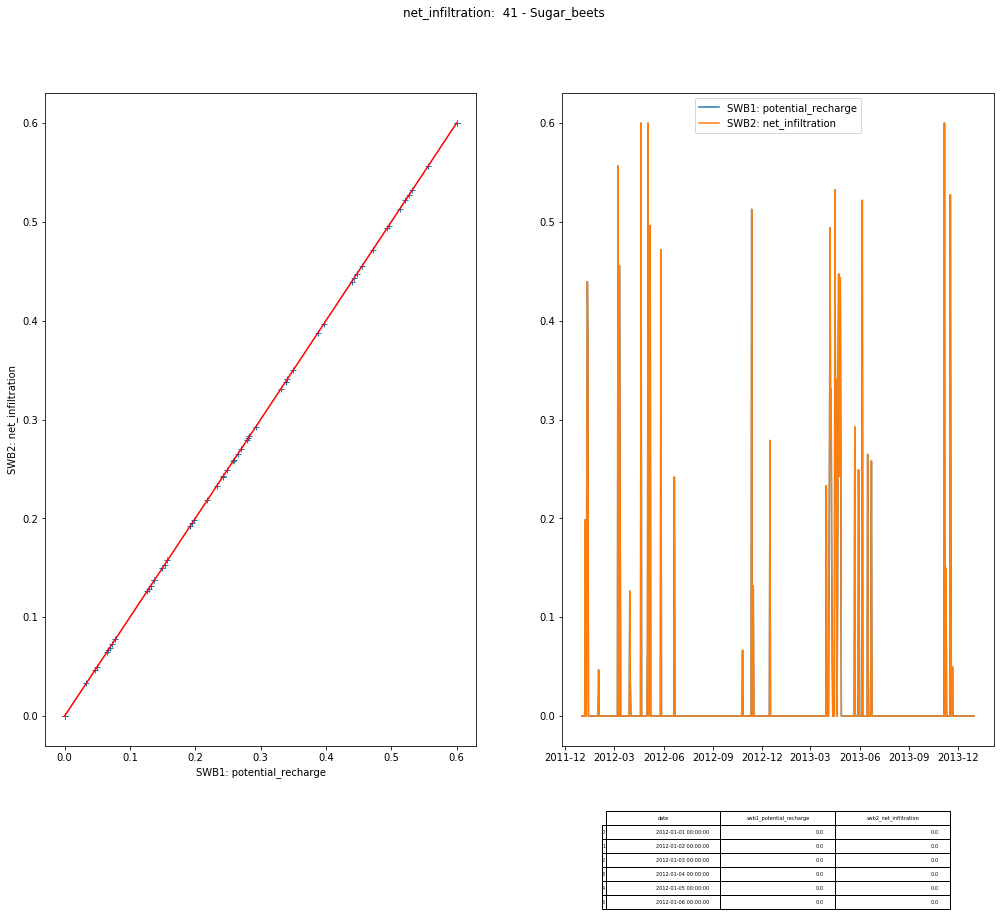

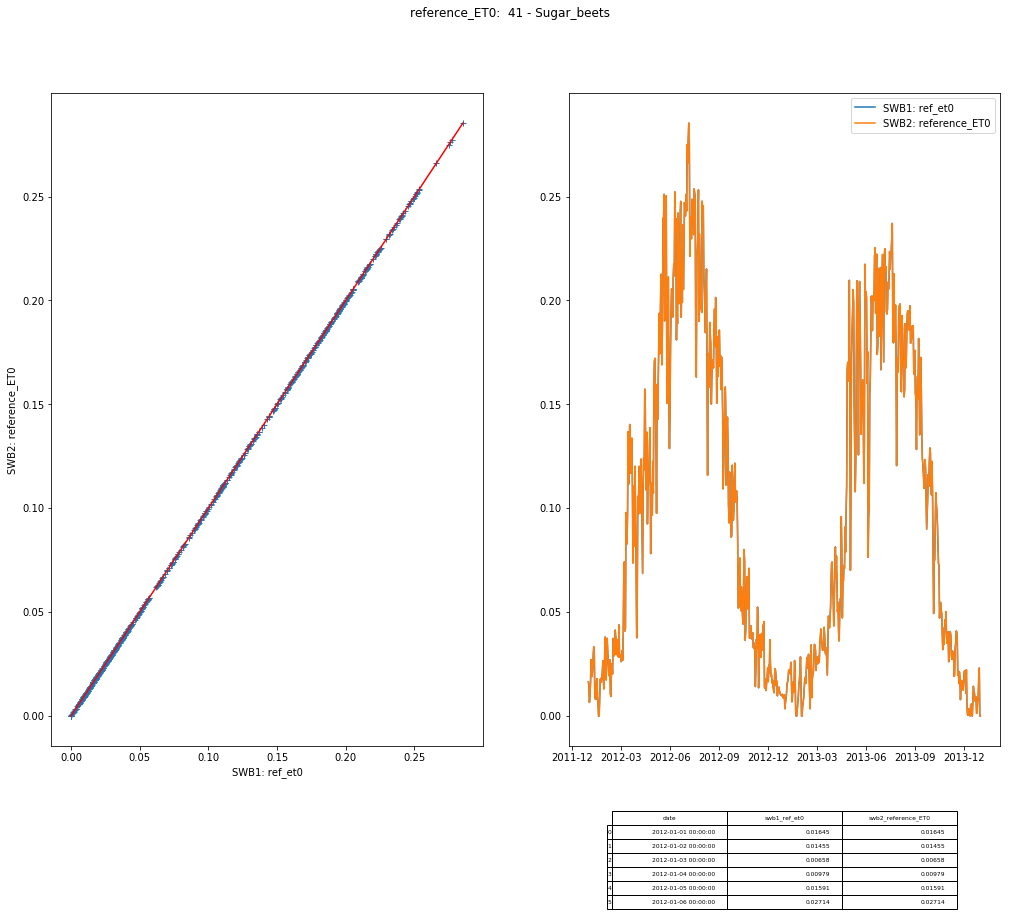

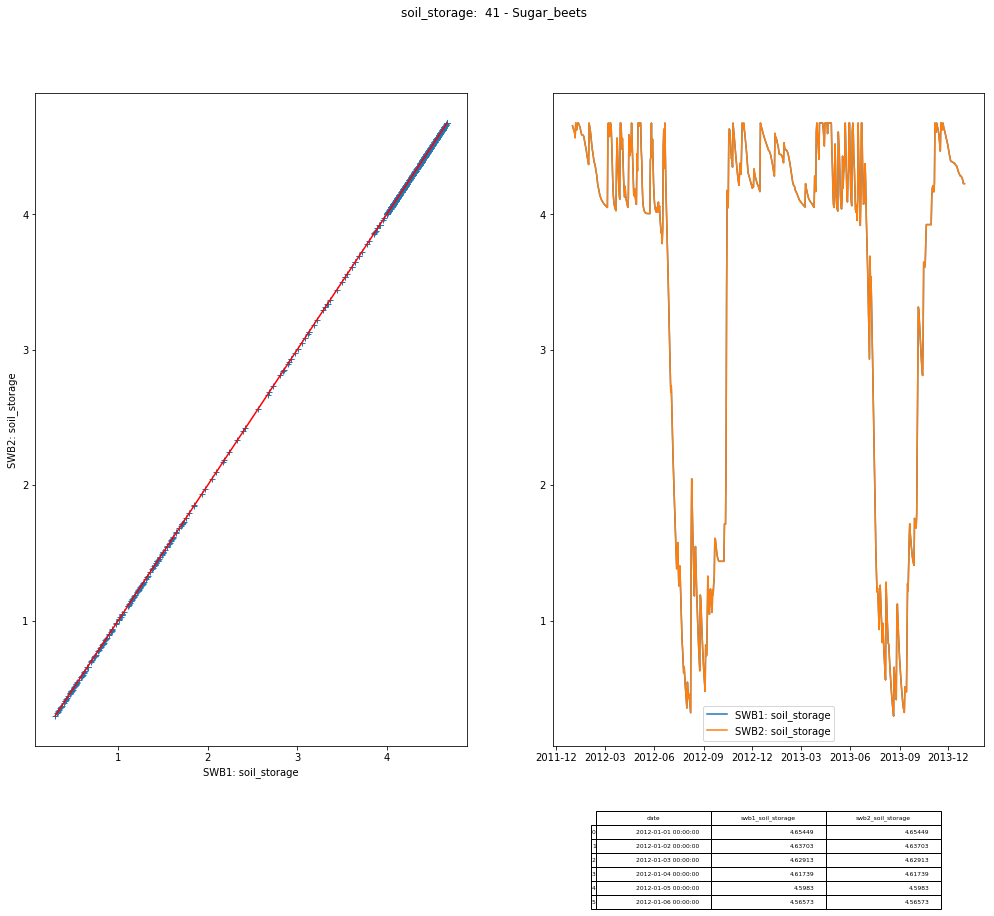

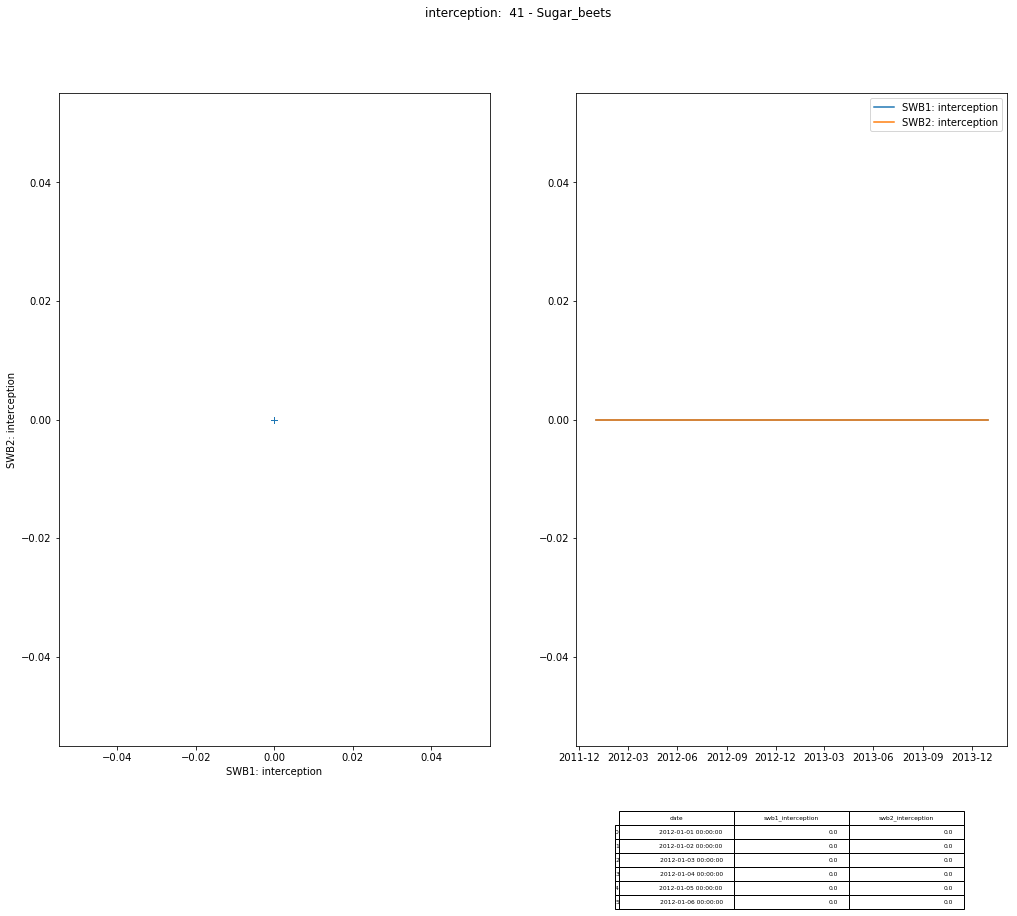

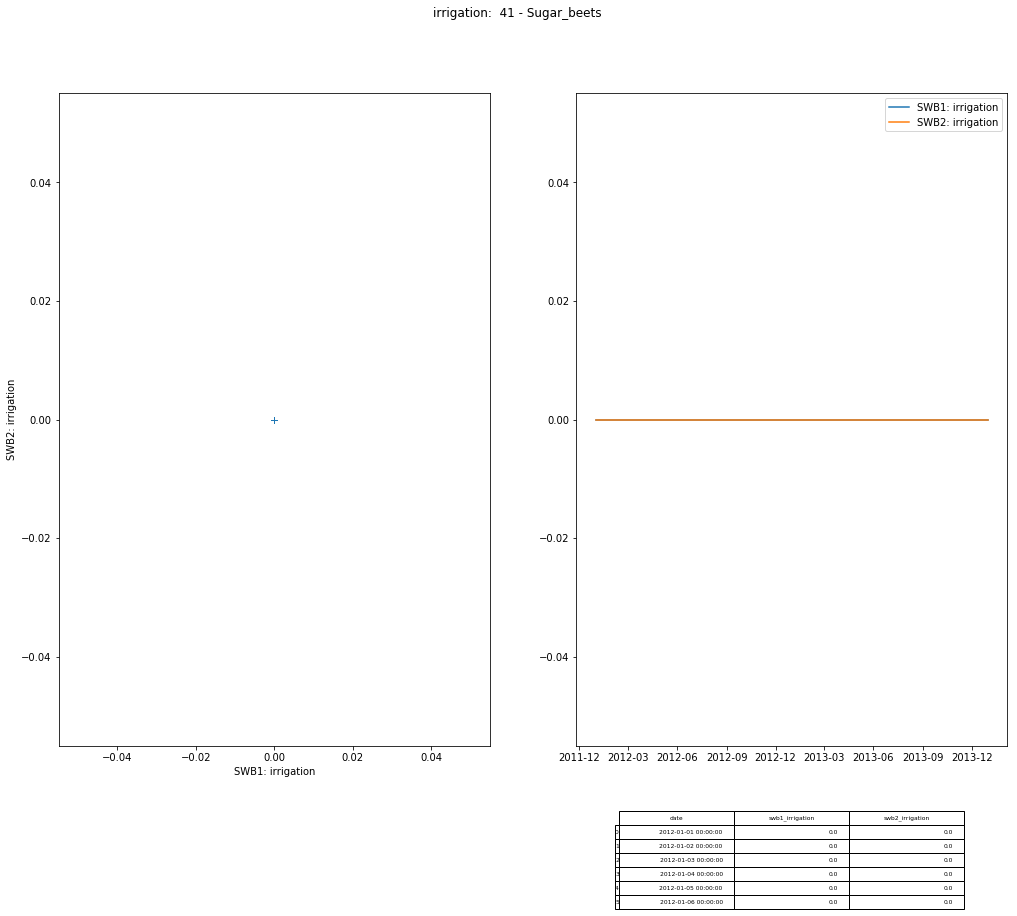

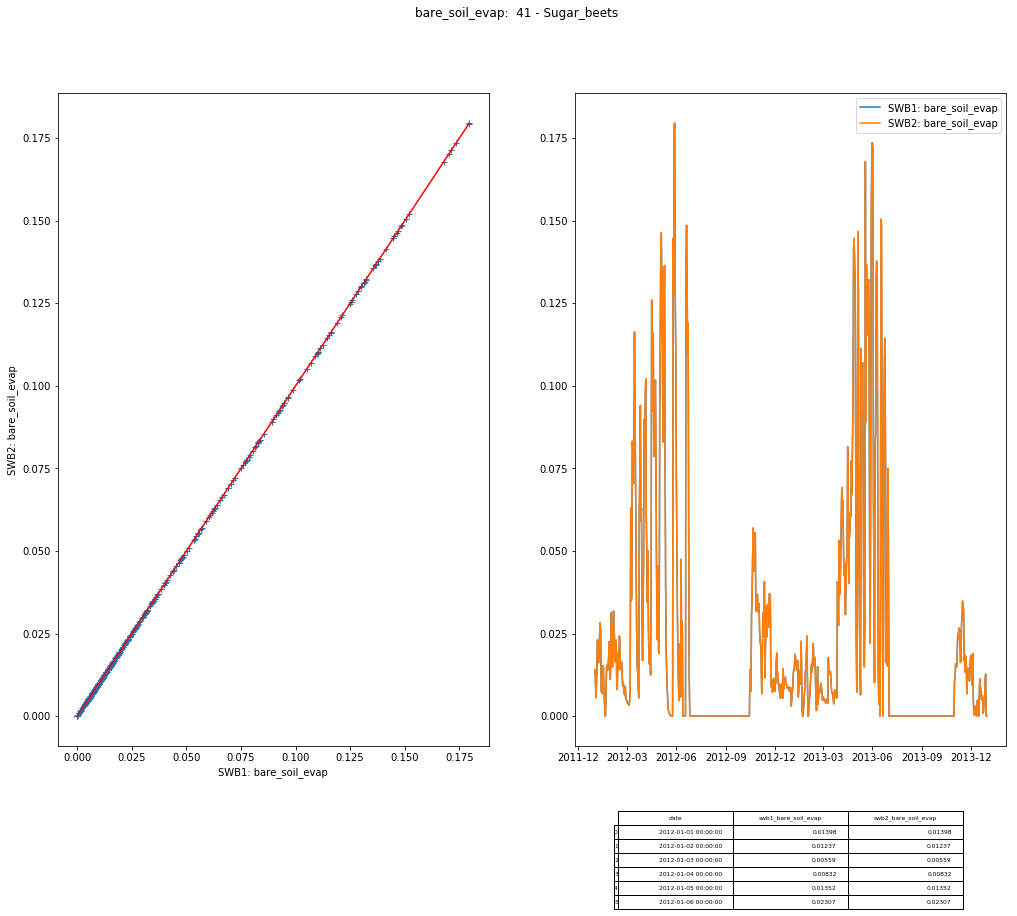

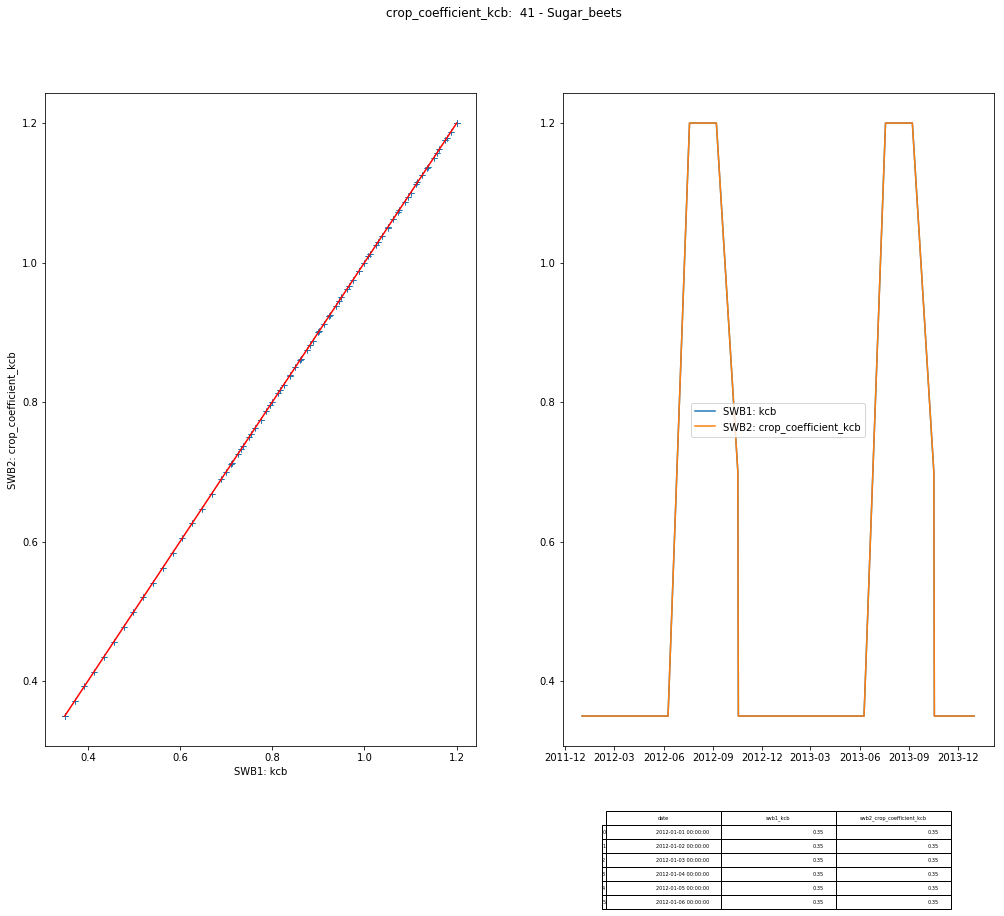

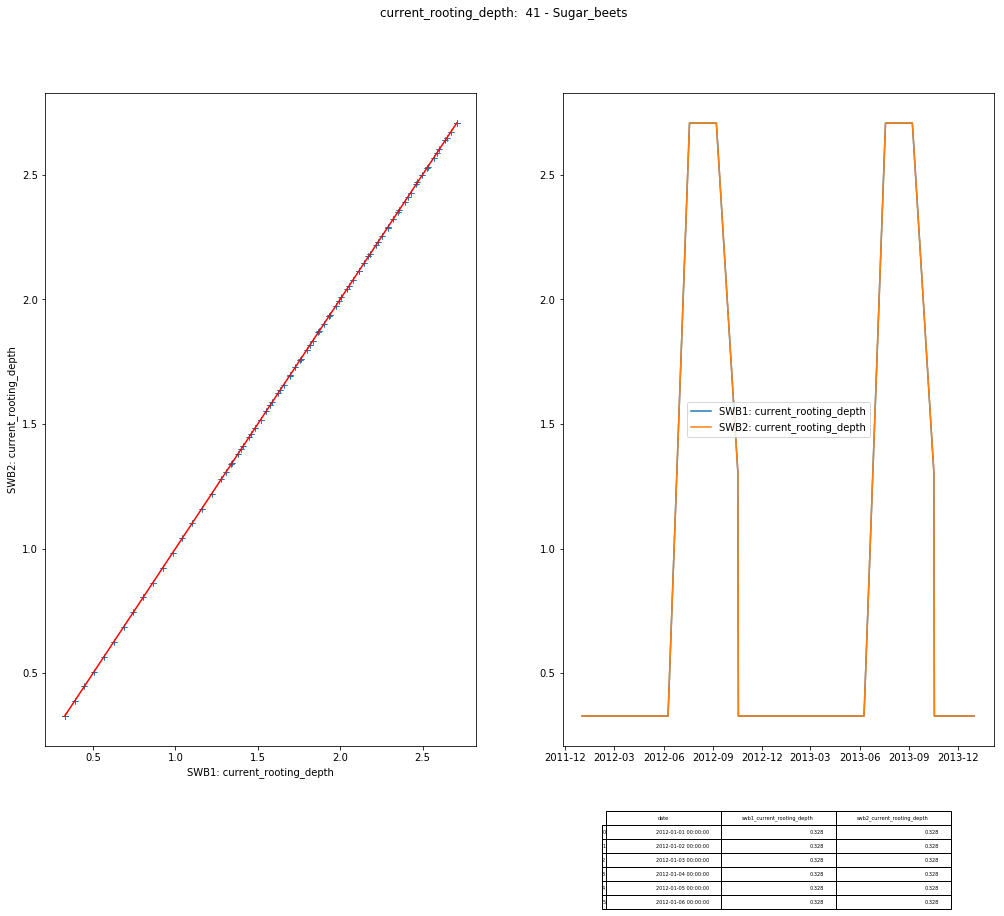

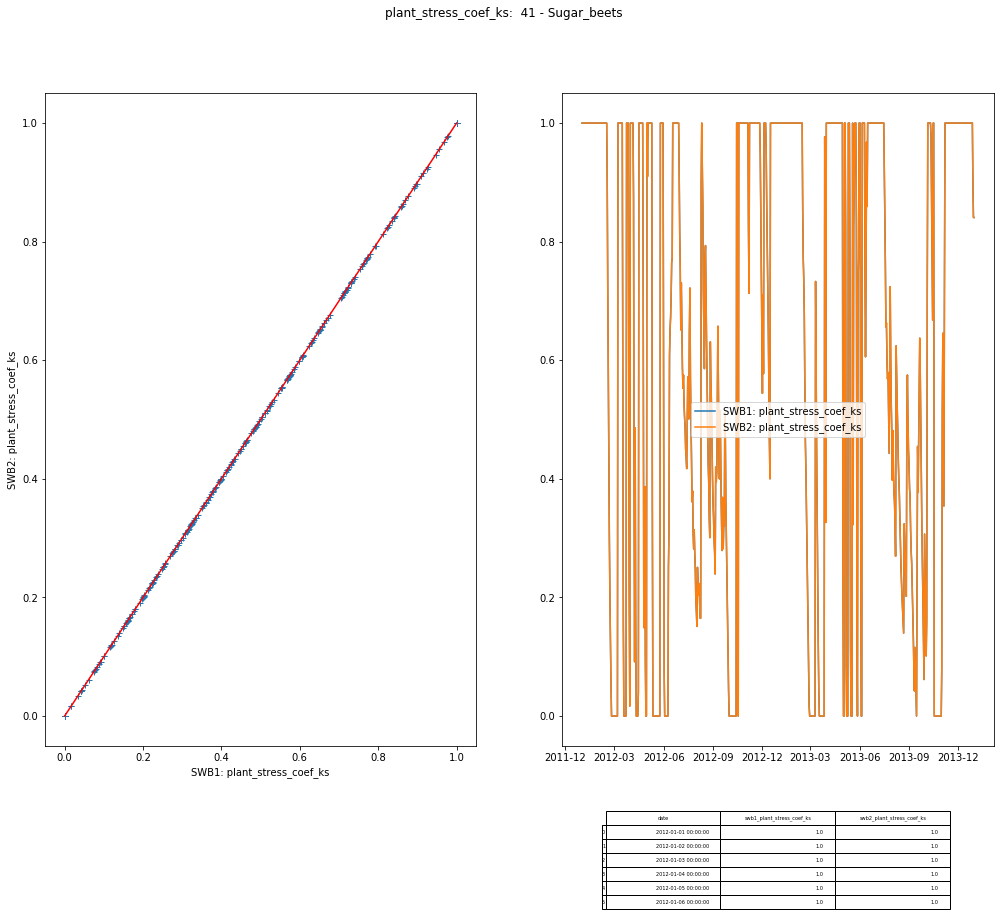

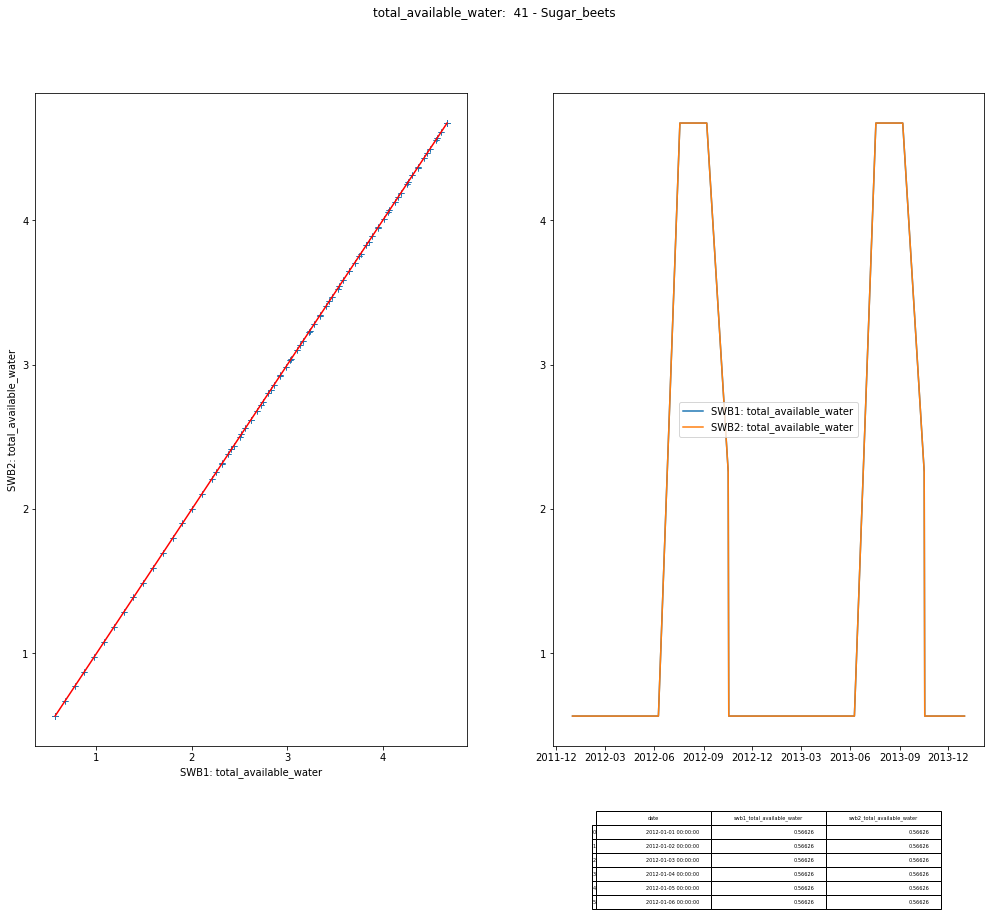

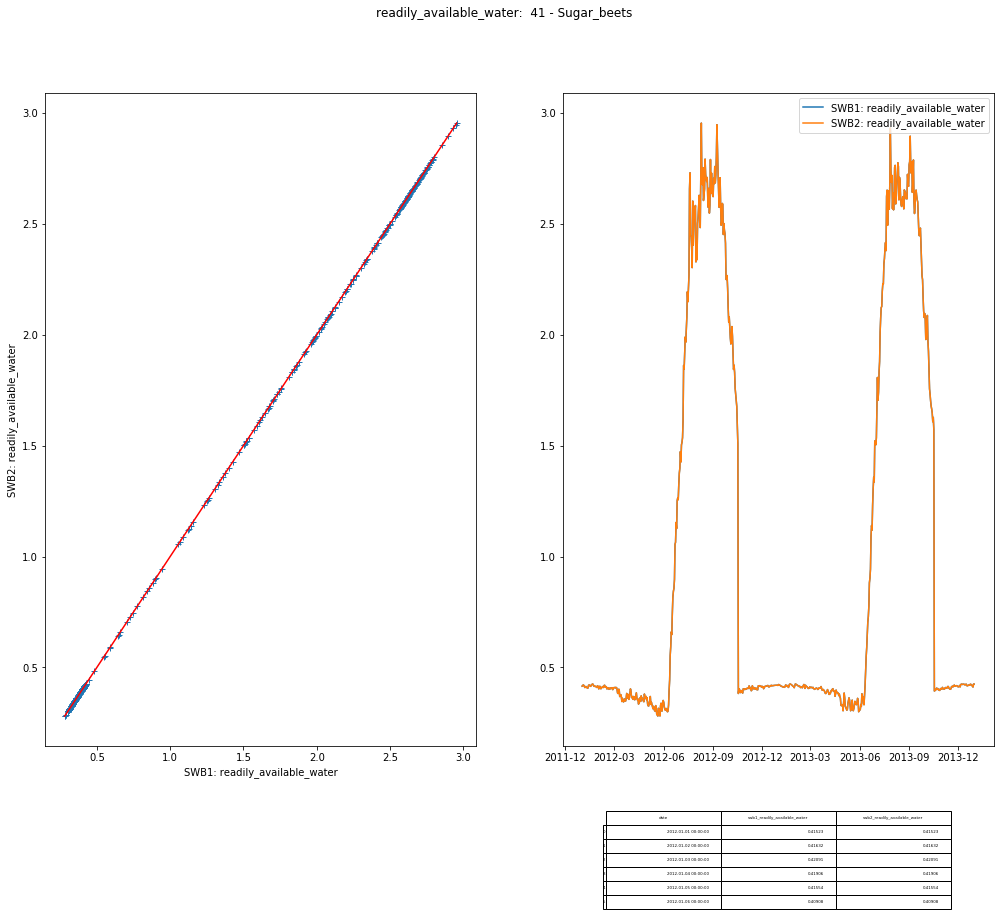

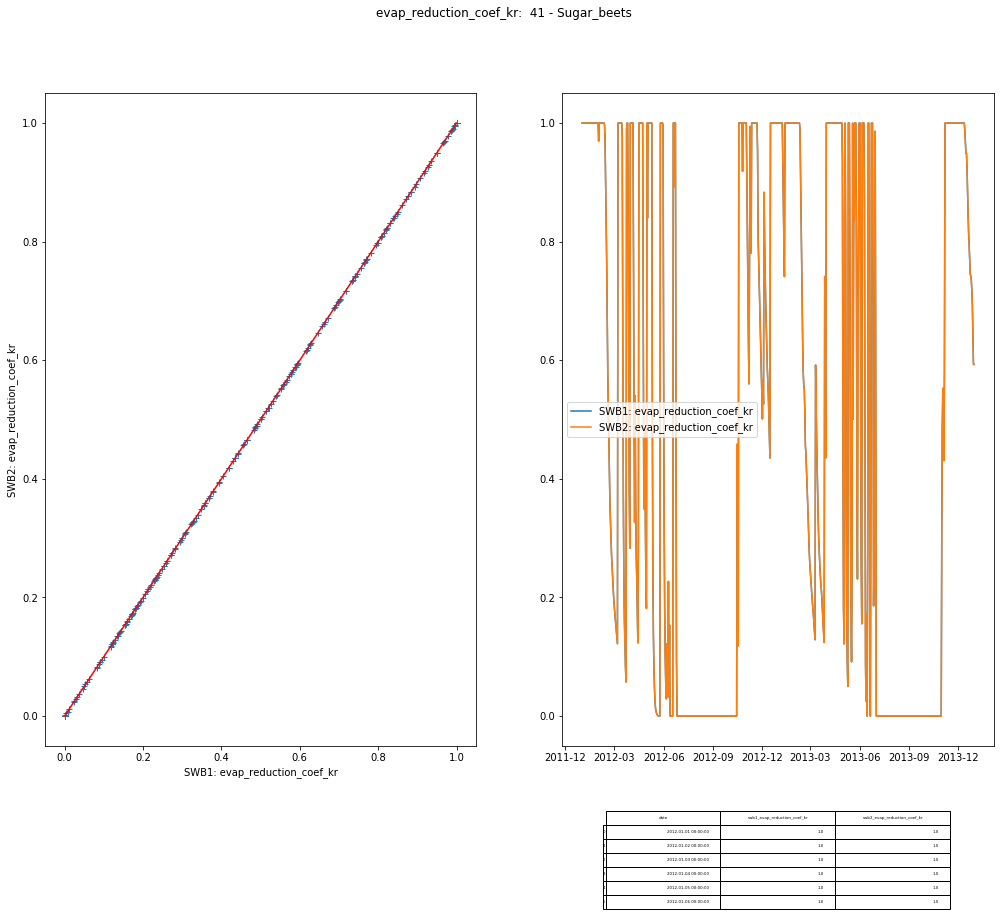

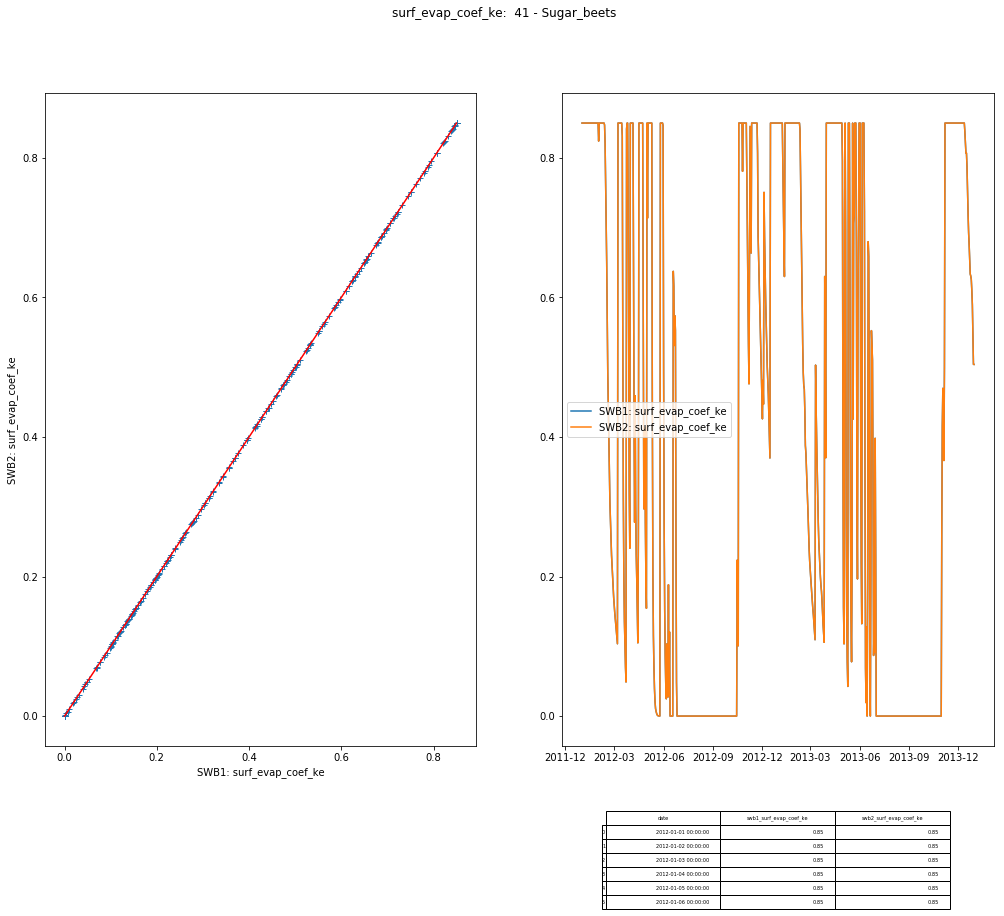

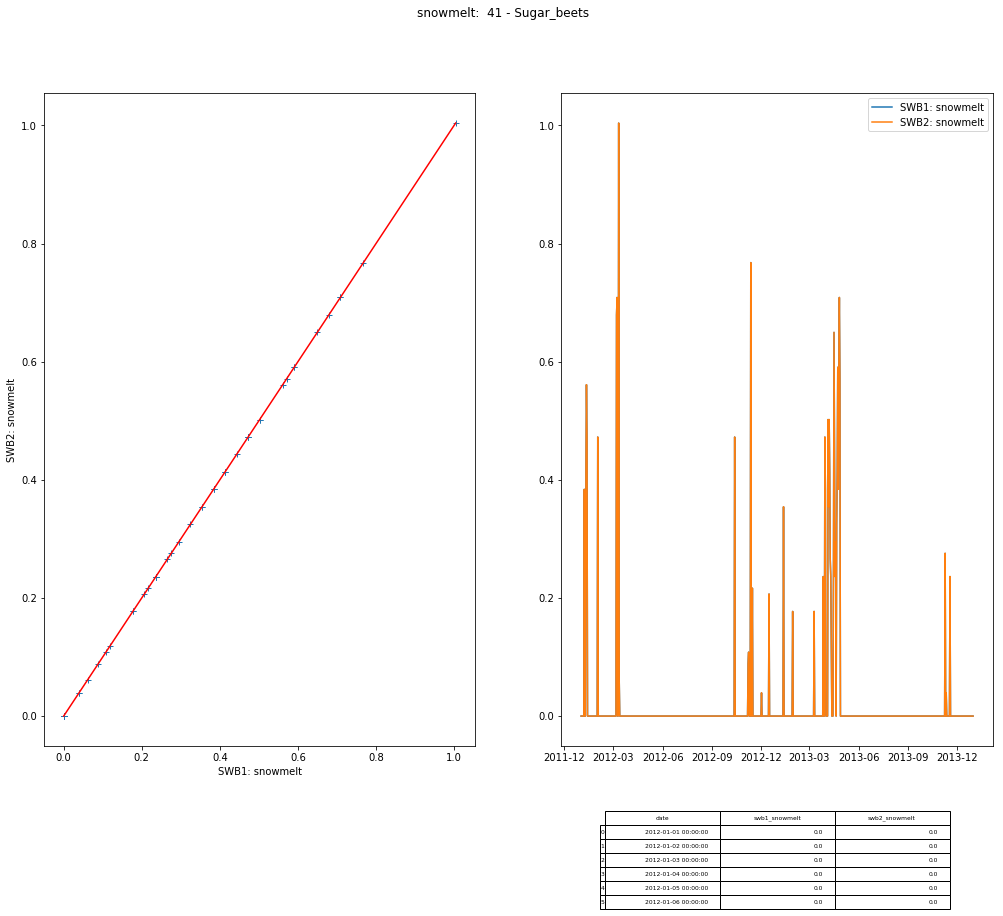

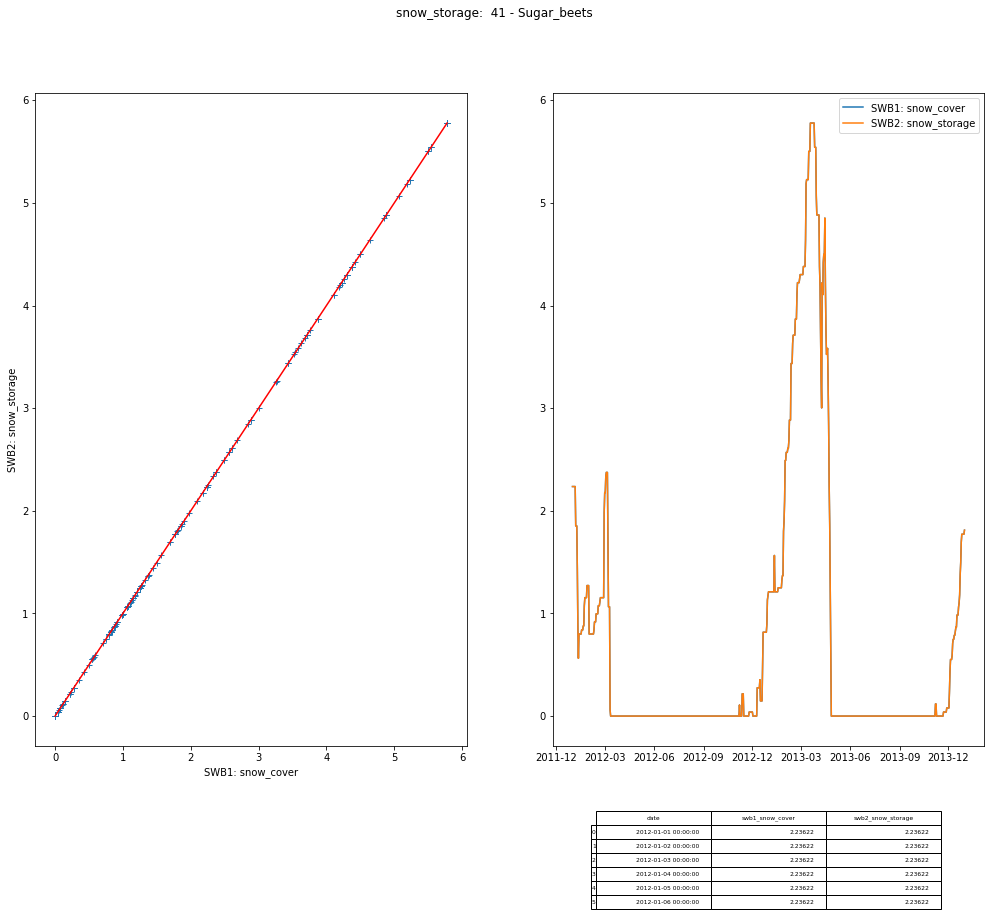

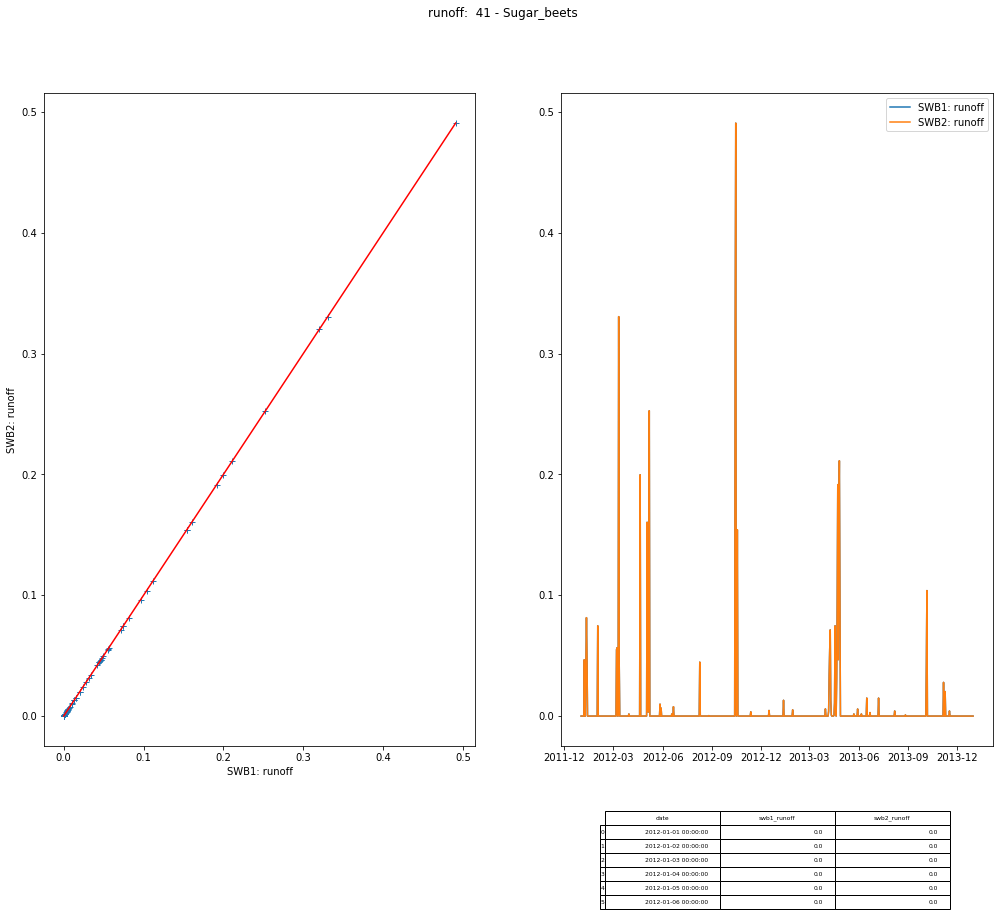

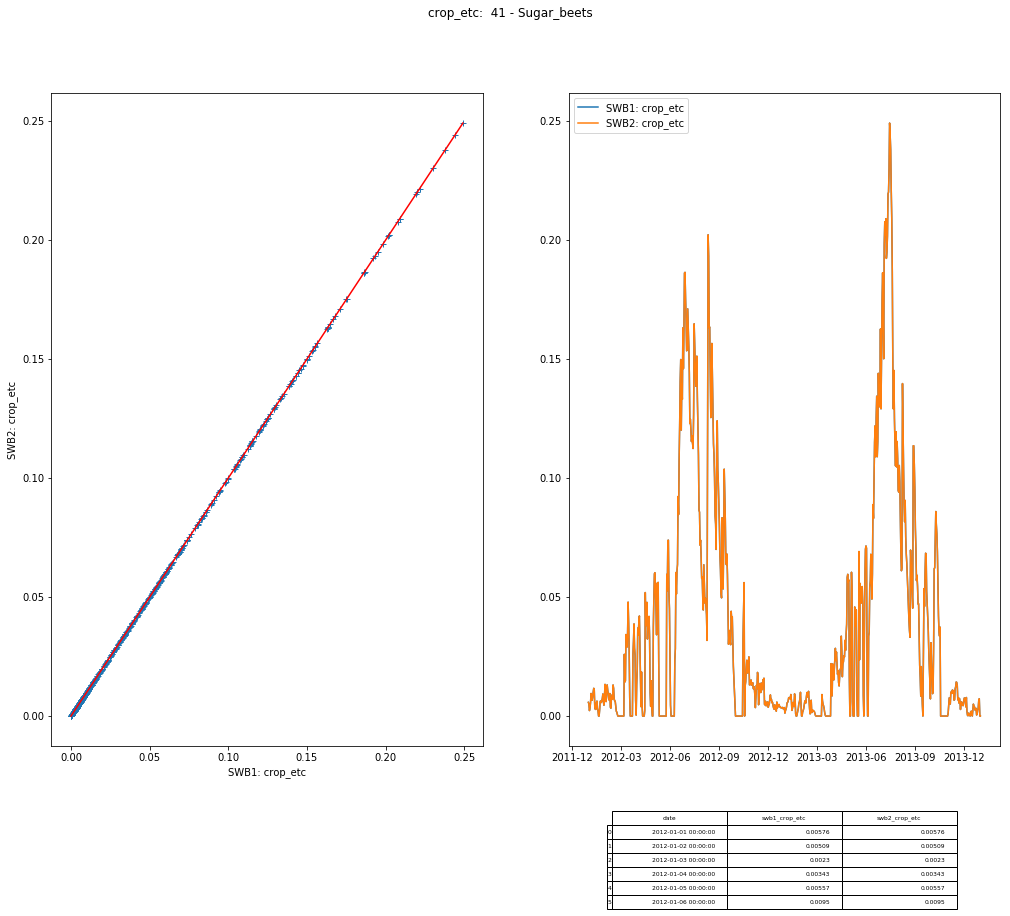

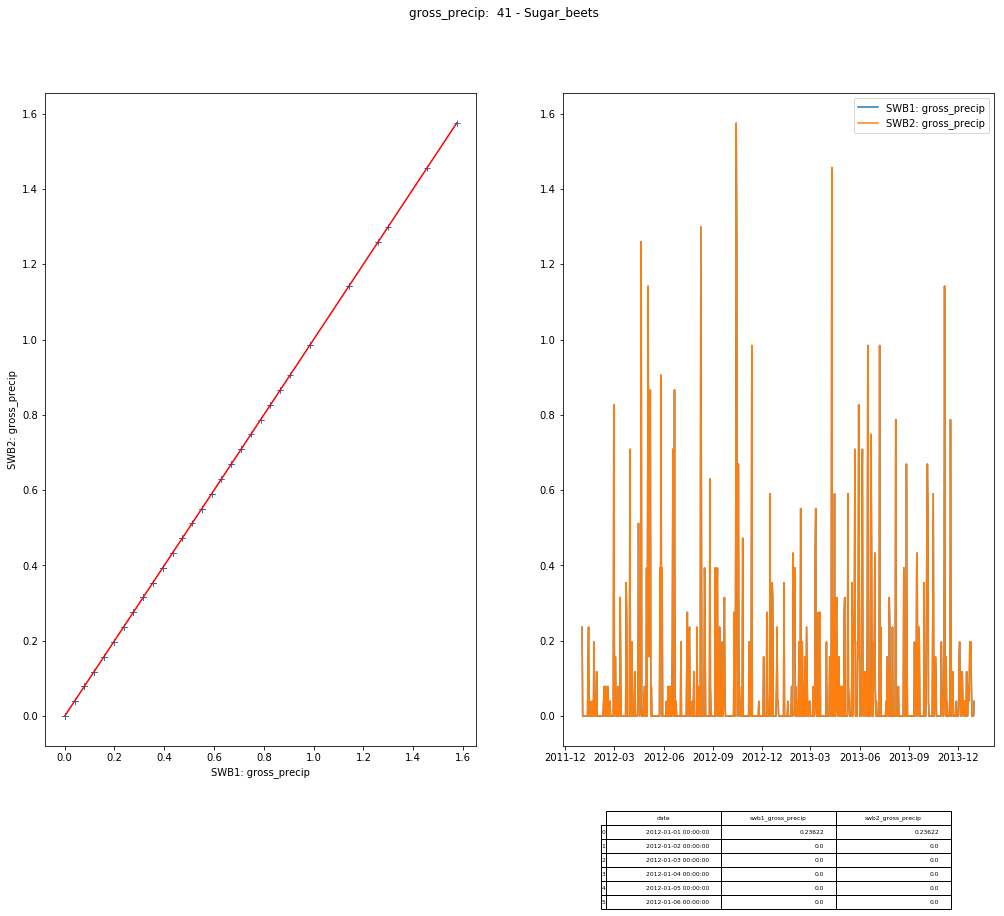

In [17]:
variable_pairs = soil_variable_pairs
for description,vals in comparison_cell_dict.items():
    print(description,vals)
    colnum = vals[0]
    rownum = vals[1]
    xcoord = vals[2]
    ycoord = vals[3]
    swb1_df = read_swb1_csv( colnum, rownum )
#    swb1_df = swb1_df.loc[swb1_df['date'].between('2012-12-01', '2013-03-31')]
    swb2_df = read_swb2_csv( colnum, rownum, xcoord, ycoord )
    swb2_df['gross_precip'] = swb2_df['rainfall'] + swb2_df['snowfall']
    make_plots( swb1_df, swb2_df, description )